# Contents:

[Background and Objective](#Background)

[Import and Warehouse data](#Data_Import)

[Data Cleansing](#Data_Cleansing)

[Data Analysis & Visualisation](#Analysis_Visualisation)

[Data Pre-Processing](#Pre-processing)

[Model Training, Testing and Tuning](#Model)

[GUI Development](#GUI)

[Conclusion and Improvisation](#Conclusion)


<a id='the_destination'></a>


<a id='Background'></a>

# Background and Objective

**• DOMAIN:** Telecom

**• CONTEXT:** A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can
analyse all relevant customer data and develop focused customer retention programs.

**• DATA DESCRIPTION:** Each row represents a customer, each column contains customer’s attributes described on the column
Metadata. The data set includes information about:

• Customers who left within the last month – the column is called Churn

• Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device
protection, tech support, and streaming TV and movies

• Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly
charges, and total charges

• Demographic info about customers – gender, age range, and if they have partners and dependents

In [1]:
import pandas as pd
import numpy as np


# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import seaborn as sns
import matplotlib.pyplot as plt



from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
import pickle

# To visualise Decision Trees
from sklearn.tree import export_graphviz
from os import system
from IPython.display import Image


# To see multiple outputs together

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<a id='Data_Import'></a>

# Import and Warehouse data

#### Import datasets and Explore Shape and Size

In [2]:
# Import data

d1 = pd.read_csv('TelcomCustomer-Churn_1.csv')
d2 = pd.read_csv('TelcomCustomer-Churn_2.csv')

In [3]:
# Looking into the data through few observations

d1.head()
d2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Shape and size of each data

print("Data 1 has {} rows / observations and {} columns / features".format(d1.shape[0],d1.shape[1]))
print()
print("Data 2 has {} rows / observations and {} columns / features".format(d2.shape[0],d2.shape[1]))
print()
print('The size of Data 1 is:', d1.size)
print()
print('The size of Data 2 is:', d2.size)


Data 1 has 7043 rows / observations and 10 columns / features

Data 2 has 7043 rows / observations and 11 columns / features

The size of Data 1 is: 70430

The size of Data 2 is: 77473


#### Merging data sets to one and explore shape and size of final data

* Data 1 has a identifier i.e. Customer ID, however Data 2 does not have any identifier.

* Since both data-sets have same number of rows we assume that in Data 2 the observations correspond to the Customer ID is Data 1 in the same order.

* With the above assumption we will merge the two data-sets horizontally using 'join'. 'Join' combines dataframes using the index to identify common entries.

In [5]:
# Join the individual data-sets

customerdf = d1.join(d2,how='inner')

In [6]:
# View sample observations from the final customer data

customerdf.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# Exploring Shape and Size of Final data

print("Final data has {} rows / observations and {} columns / features".format(customerdf.shape[0],customerdf.shape[1]))
print()
print('The size of Final data is:', customerdf.size)

Final data has 7043 rows / observations and 21 columns / features

The size of Final data is: 147903


The final data has 7043 rows which is same as individual data-sets and 21 columns which is the sum of columns from individual data-sets. Hence, in terms of number of rows and columns the merge has been fine.

<a id='Data_Cleansing'></a>

# Data Cleansing

#### Missing value treatment

To Check missing values we do an info(). This gives us an idea not only about missing values but also about the data types of variables. This is required as Python only identifies NaN as missing values but sometimes there could be unidentified missing values which may come up through incorrect data-type.

In [8]:
# Performing info to check data-types and missing value

customerdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


* Report shows there's no variable with missing values.
* However, "Total Charges" is object data-type when it should be numerical. Hence, we suspect that there's something wrong with the values of this variable.
* We will try with a frequency distribution to check if there's any unexpected symbol.

In [9]:
# Frequency distribution of Total Charges

customerdf.TotalCharges.value_counts()

           11
20.2       11
19.75       9
19.65       8
20.05       8
           ..
2773.9      1
5321.25     1
1055.9      1
958.15      1
1193.05     1
Name: TotalCharges, Length: 6531, dtype: int64

There are few blanks which may be the cause of the variable appearing as an object type. Below are the steps to treat the missing values.

1. Replace these blanks with 0s.
2. Convert the variable to float type.
3. Either drop those rows with missing values (if percentage of missing is too low we can drop), else impute with mean / median.

In [10]:
# Replacing Blanks with zeros and verifying the same

customerdf['TotalCharges'] = customerdf['TotalCharges'].replace([' '],[0])
customerdf.TotalCharges.value_counts()

# Conevrting to float and verifying same

customerdf["TotalCharges"] = customerdf.TotalCharges.astype(float)
customerdf.TotalCharges.dtype

0          11
20.2       11
19.75       9
20.05       8
19.65       8
           ..
5321.25     1
1055.9      1
958.15      1
847.8       1
1021.8      1
Name: TotalCharges, Length: 6531, dtype: int64

dtype('float64')

We calculate the percentage of missing rows and then take a decision.

In [11]:
print("Missing row percentage : {0} ({1:0.2f}%)".format(len(customerdf.loc[customerdf['TotalCharges'] == 0]), (len(customerdf.loc[customerdf['TotalCharges'] == 0])/len(customerdf.index)) * 100))

Missing row percentage : 11 (0.16%)


The percentage is very close to 0, however, we will first check the missing values on other variables and then decide if we can drop or we impute.

In [12]:
# Use describe to see significant stats of numeric variables 
# and also see if there might be any 0 values which may suggest missing information

customerdf.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


* Senior Citizen is more like a binary feature and hence we ignore the information.
* Tenure has minimum value of 0 which seems incorrect. The unit of tenure has not been specified. The maximum value of 72 gives an indication that it may be in months so that the maximum tenure of a customer is 6 years. As per problem description there's a month's data. It could be these are new customers and hence showing 0 months as tenure.
* We check the overlap between the missing rows from both variables - Tenure and Total Charges.

In [13]:
check1 = pd.DataFrame(customerdf[ (customerdf['tenure'] ==0) & (customerdf['TotalCharges'] ==0)])
check1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


The missing rows are common between both variables. Also, for these customers monthly charges are non-zero which indicates that customers are already paying monthly charges and hence  have tenure for more than a month. We conclude that missing data is then due to some input error and in next step will treat them.

In [14]:
# Imputing missing values with median

cust = customerdf[['tenure','TotalCharges']].copy()

from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values=0, strategy="median")
cols=cust.columns
cust = pd.DataFrame(rep_0.fit_transform(cust))

cust.columns = cols

cust.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tenure        7043 non-null   float64
 1   TotalCharges  7043 non-null   float64
dtypes: float64(2)
memory usage: 110.2 KB


In [15]:
# Replacing back columns with imputed values to original customerdf

customerdf.drop(['tenure','TotalCharges'],
  axis='columns', inplace=True)

customerdf['Tenure'] = cust['tenure'].astype(float)
customerdf['TotalCharges'] = cust['TotalCharges'].astype(float)

In [16]:
# Verifying the above step

customerdf.head(2)
customerdf.info()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,Tenure,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,No,1.0,29.85
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,No,34.0,1889.50


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


#### Conversion of categorical variables to continuous

For this we follow the below steps:
1. Convert all the object variables to categorical type
2. Check the frequencies of all the categorical variables to understand the classes and if there is any relevant order in those classes
3. Perform One Hot Encoding to convert them to continuous


In [17]:
# Convert object to categorical

for feature in customerdf.columns: # 
    if customerdf[feature].dtype == 'object':
        customerdf[feature] = pd.Categorical(customerdf[feature])
customerdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   category
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod     7043 n

In [18]:
# Copying dataset for visualisation before encoding

cust_info=customerdf.copy()

In [19]:
# Value Counts

customerdf.gender.value_counts()
customerdf.SeniorCitizen.value_counts()
customerdf.Partner.value_counts()
customerdf.Dependents.value_counts()
customerdf.PhoneService.value_counts()
customerdf.MultipleLines.value_counts()
customerdf.InternetService.value_counts()
customerdf.OnlineSecurity.value_counts()
customerdf.OnlineBackup.value_counts()
customerdf.DeviceProtection.value_counts()
customerdf.TechSupport.value_counts()
customerdf.StreamingTV.value_counts()
customerdf.StreamingMovies.value_counts()
customerdf.Contract.value_counts()
customerdf.PaperlessBilling.value_counts()
customerdf.PaymentMethod.value_counts()
customerdf.Churn.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

No     3641
Yes    3402
Name: Partner, dtype: int64

No     4933
Yes    2110
Name: Dependents, dtype: int64

Yes    6361
No      682
Name: PhoneService, dtype: int64

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

No     5174
Yes    1869
Name: Churn, dtype: int64

In [20]:
# Defining orders for variables that may have a order

replaceStruct = {
                "MultipleLines":     {"No phone service": 0, "No": 1 ,"Yes": 2},
                "InternetService": {"No": 0, "DSL":1 , "Fiber optic": 2},
                "OnlineSecurity": {"No internet service": 0, "No":1 , "Yes": 2},
                "OnlineBackup":     {"No internet service": 0, "No": 1 ,"Yes": 2},
                "DeviceProtection":     {"No internet service": 0, "No": 1 ,"Yes": 2},
                "TechSupport":     {"No internet service": 0, "No": 1 ,"Yes": 2},
                "StreamingTV":     {"No internet service": 0, "No": 1 ,"Yes": 2},
                "StreamingMovies":     {"No internet service": 0, "No": 1 ,"Yes": 2},
                "Contract":     {"Month-to-month": 1, "One year": 2 ,"Two year": 3},
                "PhoneService":     {"No": 0, "Yes": 1 },
                "Churn":     {"No": 0, "Yes": 1 } 
                    }
# Will use the other categorical variables for Encoding
oneHotCols=["gender","Partner","Dependents","PaperlessBilling","PaymentMethod"]


In [21]:
# Re-defining the ordered categorical variables

customerdf=customerdf.replace(replaceStruct)


In [22]:
# Using labelEncoder to redefine the other categorical variables

from sklearn.preprocessing import LabelEncoder

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [23]:
customerdf=MultiColumnLabelEncoder(columns = ["gender","Partner","Dependents","PaperlessBilling","PaymentMethod"]).fit_transform(customerdf)

In [24]:
# Verifying the categorical to continuous transformation is correct

customerdf.head(8)
customerdf.info()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,Tenure,TotalCharges
0,7590-VHVEG,0,0,1,0,0,0,1,1,2,...,1,1,1,1,1,2,29.85,0,1.0,29.85
1,5575-GNVDE,1,0,0,0,1,1,1,2,1,...,1,1,1,2,0,3,56.95,0,34.0,1889.50
2,3668-QPYBK,1,0,0,0,1,1,1,2,2,...,1,1,1,1,1,3,53.85,1,2.0,108.15
3,7795-CFOCW,1,0,0,0,0,0,1,2,1,...,2,1,1,2,0,0,42.30,0,45.0,1840.75
4,9237-HQITU,0,0,0,0,1,1,2,1,1,...,1,1,1,1,1,2,70.70,1,2.0,151.65
5,9305-CDSKC,0,0,0,0,1,2,2,1,1,...,1,2,2,1,1,2,99.65,1,8.0,820.50
6,1452-KIOVK,1,0,0,1,1,2,2,1,2,...,1,2,1,1,1,1,89.10,0,22.0,1949.40
7,6713-OKOMC,0,0,0,0,0,0,1,2,1,...,1,1,1,1,0,3,29.75,0,10.0,301.90


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   category
 1   gender            7043 non-null   int32   
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   int32   
 4   Dependents        7043 non-null   int32   
 5   PhoneService      7043 non-null   int64   
 6   MultipleLines     7043 non-null   int64   
 7   InternetService   7043 non-null   int64   
 8   OnlineSecurity    7043 non-null   int64   
 9   OnlineBackup      7043 non-null   int64   
 10  DeviceProtection  7043 non-null   int64   
 11  TechSupport       7043 non-null   int64   
 12  StreamingTV       7043 non-null   int64   
 13  StreamingMovies   7043 non-null   int64   
 14  Contract          7043 non-null   int64   
 15  PaperlessBilling  7043 non-null   int32   
 16  PaymentMethod     7043 n

#### Dropping attributes

There is no irrelevant attribute to drop at this stage. However, we will drop Customer Id.

In [25]:
customerdf.drop(['customerID'], axis='columns', inplace=True)

#### Automation of Data Cleaning

The above steps have been already automated while executing, example we have used Imputer for imputing missing values at one go, used loops for conversion of object data type to categorical and used Label Encoder to conevrt to continuous.

<a id='Analysis_Visualisation'></a>

# Data Analysis & Visualisation

The target variable is "Churn". The predictors can be divided into few categories.
1. Demographics of Customers - Gender, Age-group (denoted by senior citizen), if they have partners, if they have dependents.
2. Types of Services - Phone Service, Internet Service, Types of security, Types, protection, streaming etc.
3. Contract Type and Tenure
4. Charges

We will study each of these categories individually and then their relationship with the target variable.


For that, we will use the cust_info data, which contains the original values of the features.

###### Demographics of Customers

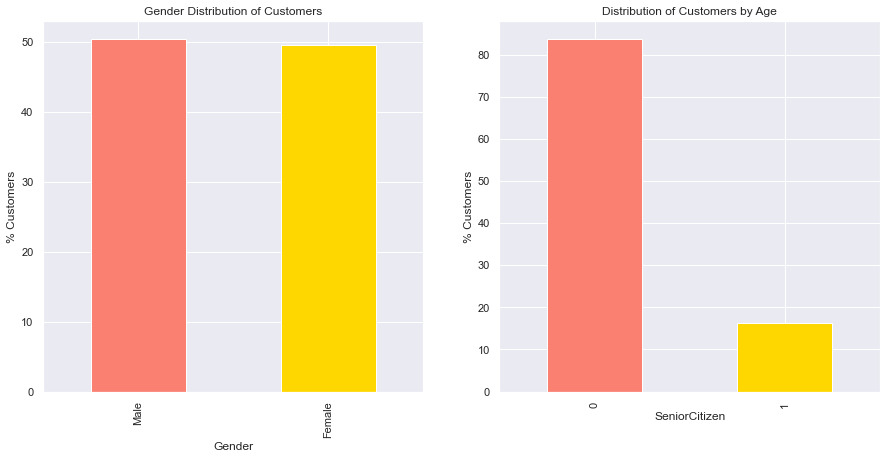

In [26]:
sns.set(rc={"figure.figsize": (15, 15)});
colors=['salmon','gold'];

plt.subplot(2,2,1);

ax = (cust_info['gender'].value_counts()*100.0 /len(cust_info)).plot(kind='bar',
                                                                           stacked = True, color=colors
                                                                         );
ax.set_ylabel('% Customers');
ax.set_xlabel('Gender');
ax.set_title('Gender Distribution of Customers');

plt.subplot(2,2,2);
ax = (cust_info['SeniorCitizen'].value_counts()*100.0 /len(cust_info)).plot(kind='bar',
                                                                           stacked = True,
                                                                            color=colors
                                                                         );
ax.set_ylabel('% Customers');
ax.set_xlabel('SeniorCitizen');
ax.set_title('Distribution of Customers by Age');


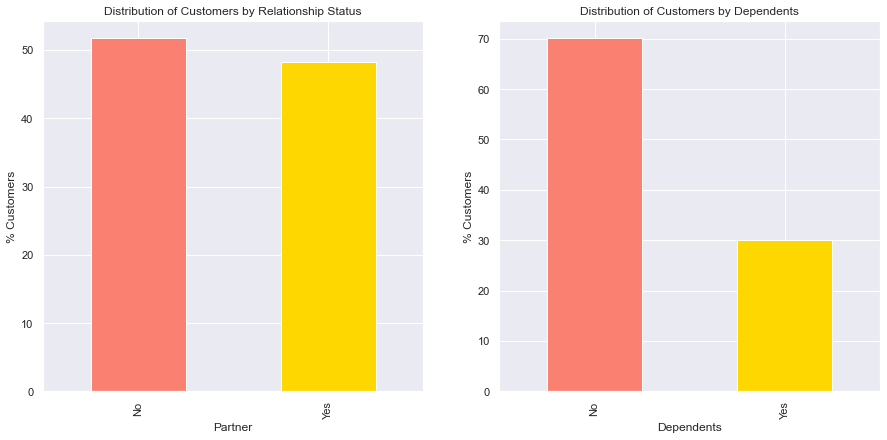

In [27]:
sns.set(rc={"figure.figsize": (15, 15)});
colors=['salmon','gold'];

plt.subplot(2,2,1);

ax = (cust_info['Partner'].value_counts()*100.0 /len(cust_info)).plot(kind='bar',
                                                                           stacked = True, color=colors
                                                                         );
ax.set_ylabel('% Customers');
ax.set_xlabel('Partner');
ax.set_title('Distribution of Customers by Relationship Status');

plt.subplot(2,2,2);
ax = (cust_info['Dependents'].value_counts()*100.0 /len(cust_info)).plot(kind='bar',
                                                                           stacked = True,
                                                                            color=colors
                                                                         );
ax.set_ylabel('% Customers');
ax.set_xlabel('Dependents');
ax.set_title('Distribution of Customers by Dependents');


* The data is equally distributed in terms of customer gender.
* Most of the customers are young and mid-age people accounting for more than 80% of the data and only around 16-17% are senior citizens.
* There's not much difference in distribution of customers with and without partners.
* 30% of the customers have a dependent.

##### Types of Services

Text(0.5, 1.0, 'PhoneService')

Text(0.5, 1.0, 'MultipleLines')

Text(0.5, 1.0, 'InternetService')

Text(0.5, 1.0, 'OnlineSecurity')

Text(0.5, 1.0, 'OnlineBackup')

Text(0.5, 1.0, 'DeviceProtection')

Text(0.5, 1.0, 'TechSupport')

Text(0.5, 1.0, 'StreamingTV')

Text(0.5, 1.0, 'StreamingMovies')

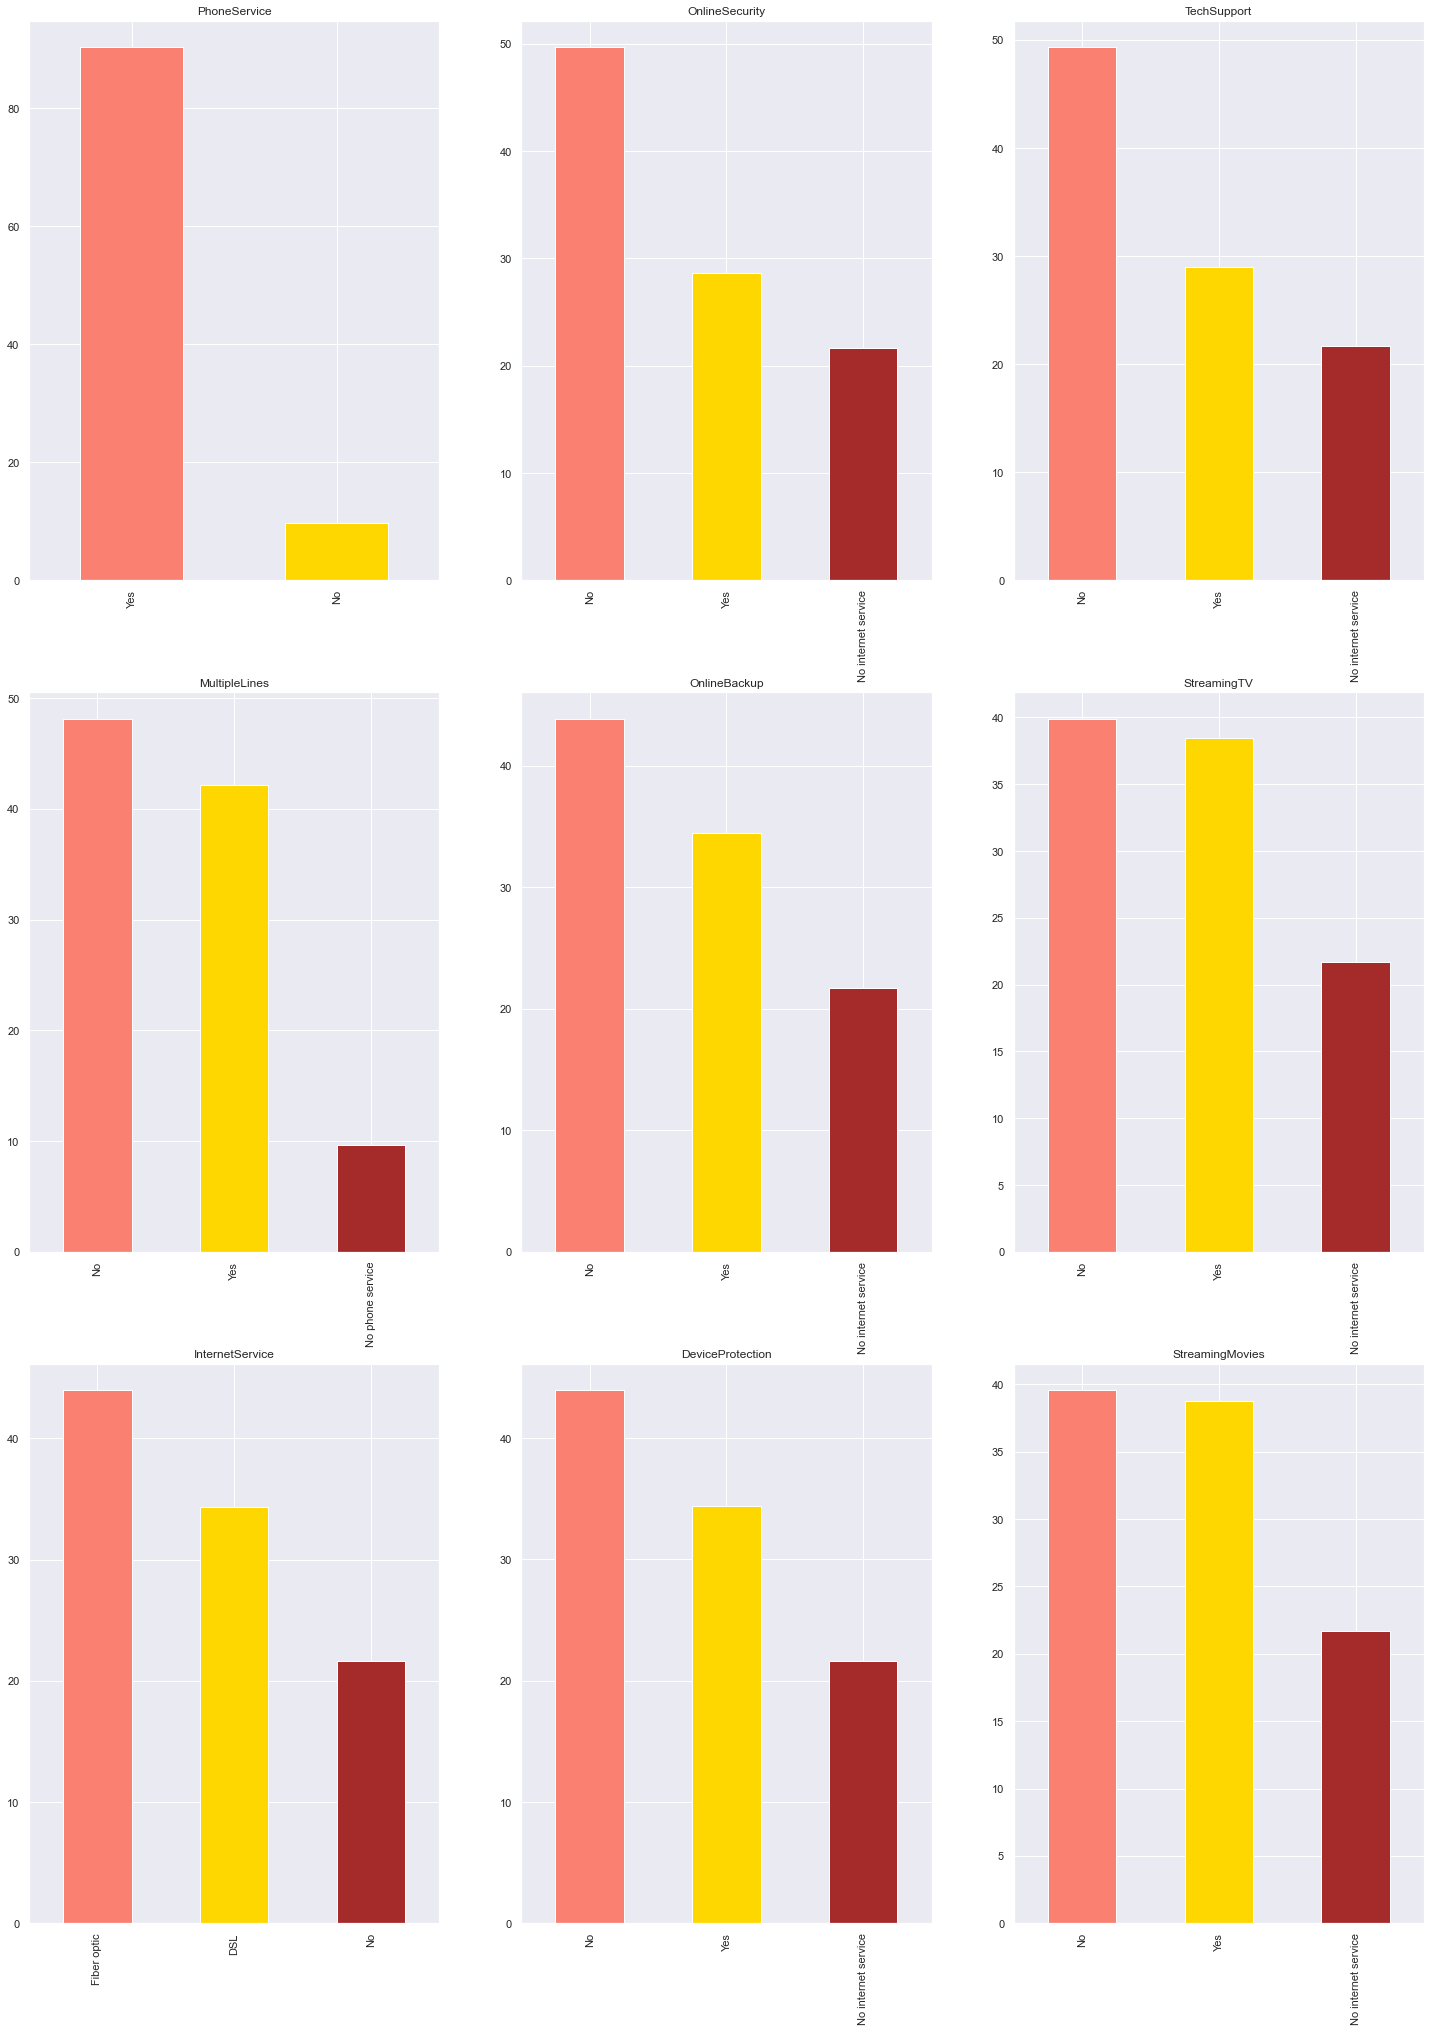

In [28]:
servicetype = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'];

colors=['salmon','gold','brown'];

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (25,35));
for i, item in enumerate(servicetype):
    if i < 3:
        ax = (cust_info[item].value_counts()*100.0 /len(cust_info)).plot(kind='bar',ax=axes[i,0],color=colors);
                                                                
                                                                         
        
    elif i >=3 and i < 6:
        ax = (cust_info[item].value_counts()*100.0 /len(cust_info)).plot(kind='bar',ax=axes[i-3,1],color=colors);
        
    elif i < 9:
        ax = (cust_info[item].value_counts()*100.0 /len(cust_info)).plot(kind='bar',ax=axes[i-6,2],color=colors);
        
    ax.set_title(item);

* Customers mostly have very basic services and not much of premium / custom services like multiple lines, security / protection etc.
* Close to 90% customers have a phone service and around 50% do not have multiple lines.
* For internet related services, 21% customers do not have an internet connection. Close 50% do not have an online security, close to 50% do not have a techsupport and around 45% do not have a tech support and device protection.
* Customers with and without TV / Movie Streaming services are almost same, around 38-39%, rest 21% do not have an internet connection.
* Interms of improved services - 43% customers have fibre optic internet service.

##### Contract Type and Tenure

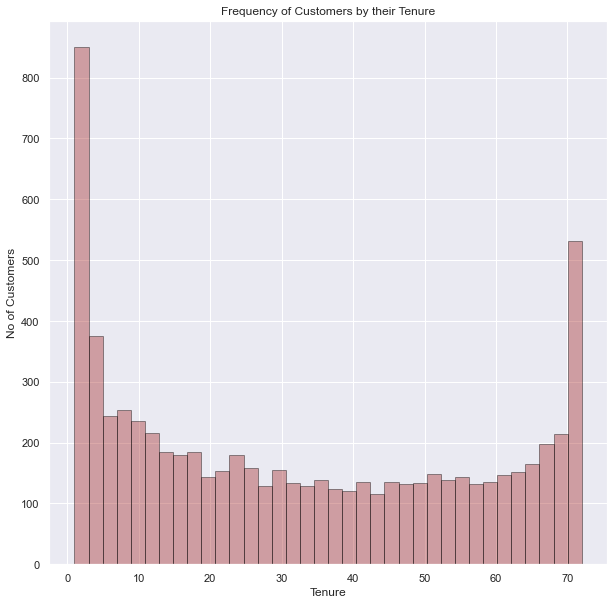

In [29]:
# Distribution of Customers by their Contract Type

sns.set(rc={"figure.figsize": (10, 10)});
ax = sns.distplot(cust_info['Tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'brown', 
             hist_kws={'edgecolor':'black'});
ax.set_ylabel('No of Customers');
ax.set_xlabel('Tenure');
ax.set_title('Frequency of Customers by their Tenure');

* Most of Customer either has a very short tenure or long tenure (around 1 month or around 72 months - assuming unit is month).

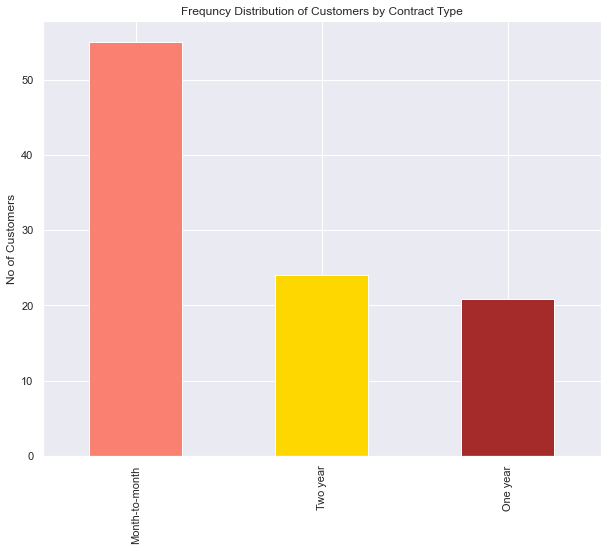

In [30]:
# Distribution of Customers by Contract Type

colors=['salmon','gold','brown'];

sns.set(rc={"figure.figsize": (10, 8)});
ax = (cust_info['Contract'].value_counts()*100.0 /len(cust_info)).plot(kind='bar',
                                                                           stacked = True, color=colors
                                                                         );
ax.set_ylabel('No of Customers');
ax.set_title('Frequncy Distribution of Customers by Contract Type');


* More than 50% of the customers have a month-to-month contract and this may explain why we find most customers with very less tenure. Probably many customers do not renew their contract.

We can study how the distribution of customers vary across different contract types and tenure to have a better idea of Contract and Tenure relationship.

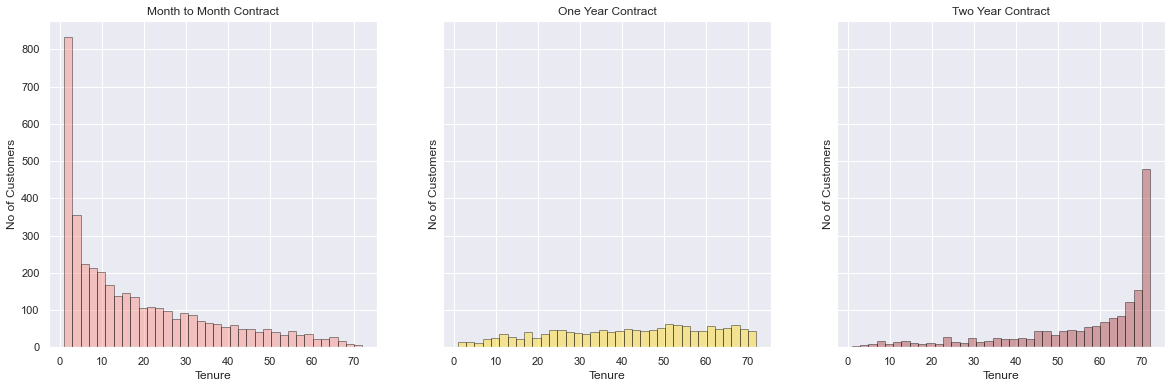

In [31]:
# Distribution of Customers across tenure for different contract types

fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6));

ax = sns.distplot(cust_info[cust_info['Contract']=='Month-to-month']['Tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'salmon',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1);
ax.set_ylabel('No of Customers');
ax.set_xlabel('Tenure');
ax.set_title('Month to Month Contract');

ax = sns.distplot(cust_info[cust_info['Contract']=='One year']['Tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'gold',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2);
ax.set_ylabel('No of Customers');
ax.set_xlabel('Tenure');
ax.set_title('One Year Contract');

ax = sns.distplot(cust_info[cust_info['Contract']=='Two year']['Tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'brown',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3);

ax.set_ylabel('No of Customers');
ax.set_xlabel('Tenure');
ax.set_title('Two Year Contract');

* Customers with month-to-month contract stay mostly for a month to two months; while customers with two years contract tend to renew and are more loyal customers.

##### Monthly and Total Charges

In [32]:
customerdf[["MonthlyCharges","TotalCharges"]].describe()

,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000
mean,64.761692,2281.916928
std,30.090047,2265.270398
min,18.250000,18.800000
25%,35.500000,402.225000
50%,70.350000,1397.475000
75%,89.850000,3786.600000
max,118.750000,8684.800000


* The average monthly charge is around 65 and the average total charges is 2282.

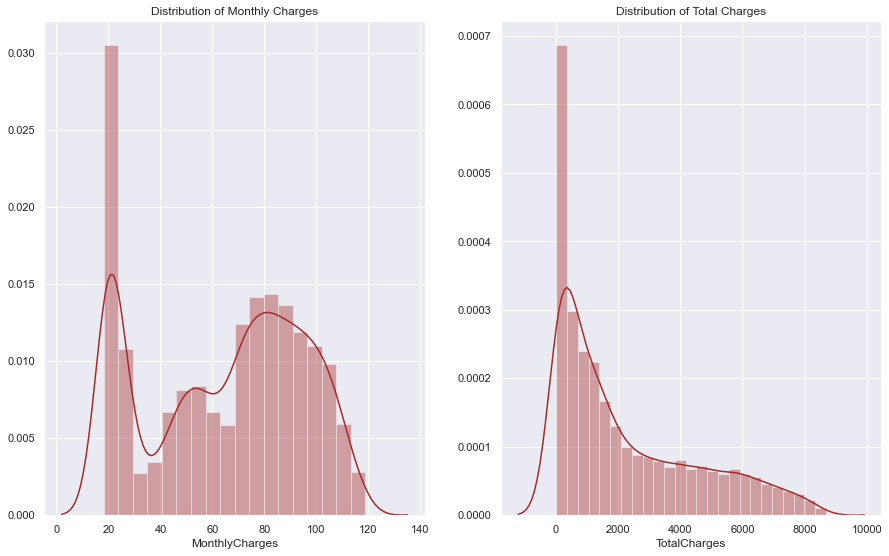

In [33]:
sns.set(rc={"figure.figsize": (15, 20)});

plt.subplot(2,2,1);
ax=sns.distplot(customerdf.MonthlyCharges, color='brown');
ax.set_title('Distribution of Monthly Charges');


plt.subplot(2,2,2);
ax=sns.distplot(customerdf.TotalCharges, color='brown');
ax.set_title('Distribution of Total Charges');



* Most customers pay a small monthly charge of around 20 units. There are two other main groups of customers - one paying around 55-60 units monthly and the other paying 70-95 units.
* Customers are concentrated around paying lower total charges. This is because most customers are probably leaving early or taking services which are basic.

From above analyses it seems features like tenure, contract, etc may have some relationship with churn. It would be interesting to see the correlation between the features to understand and confirm the same.

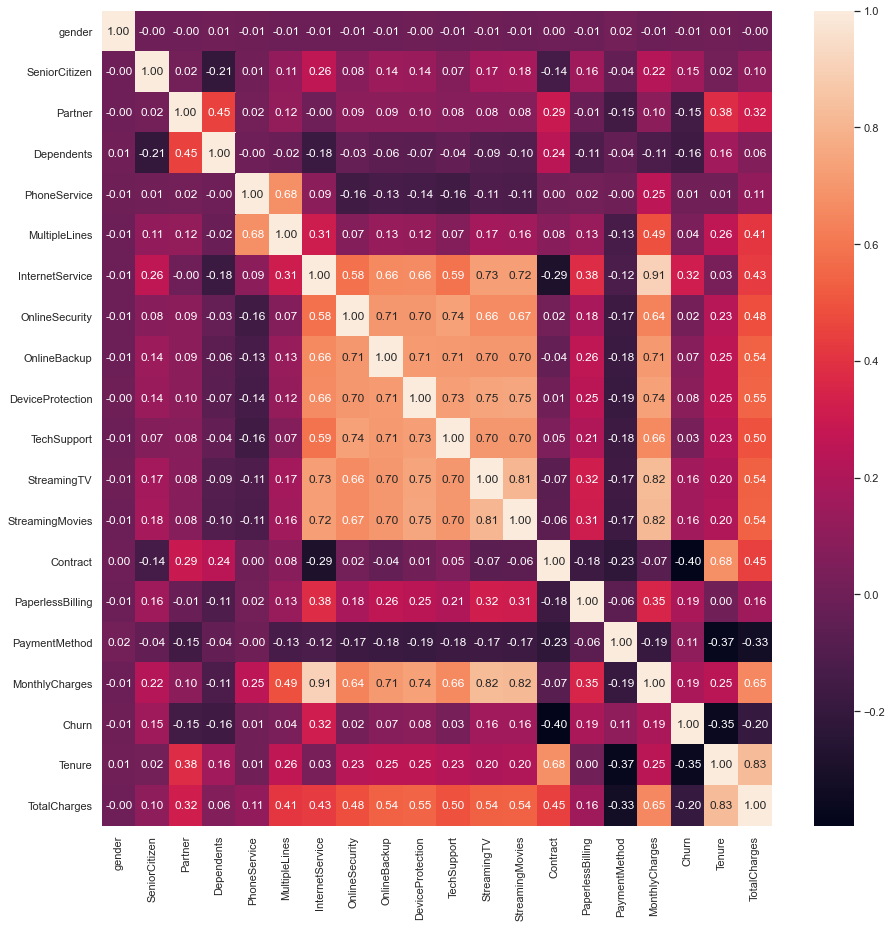

In [34]:
# Correlation of all features

f,ax=plt.subplots(figsize=(15,15));
sns.heatmap(customerdf.corr(),annot=True,fmt='.2f');
plt.show();

* Churn does not have any strong correlation with any of the features. There's a moderate to weak negative correlation with contract, tenure and charges and moderate positive correlation with internet service.
* Internet Service has strong correlation with Monthly charges and streaming facilities, which is understandable as customers pay higher charges with internet facilities and also uses the facility to watch TV and movies.
* As seen previously, there's a strong correlation between contract type and tenure - the prolonged the contract type, the more the customer stays.
* Monthly charges are strongly correlated with most the internet related features which is evident as more advanced services will require extra charges to be paid.

We look into a pairplot for only those features which have some correlation with churn to understand how the distributions of those features vary for churn and non-churn customers.

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


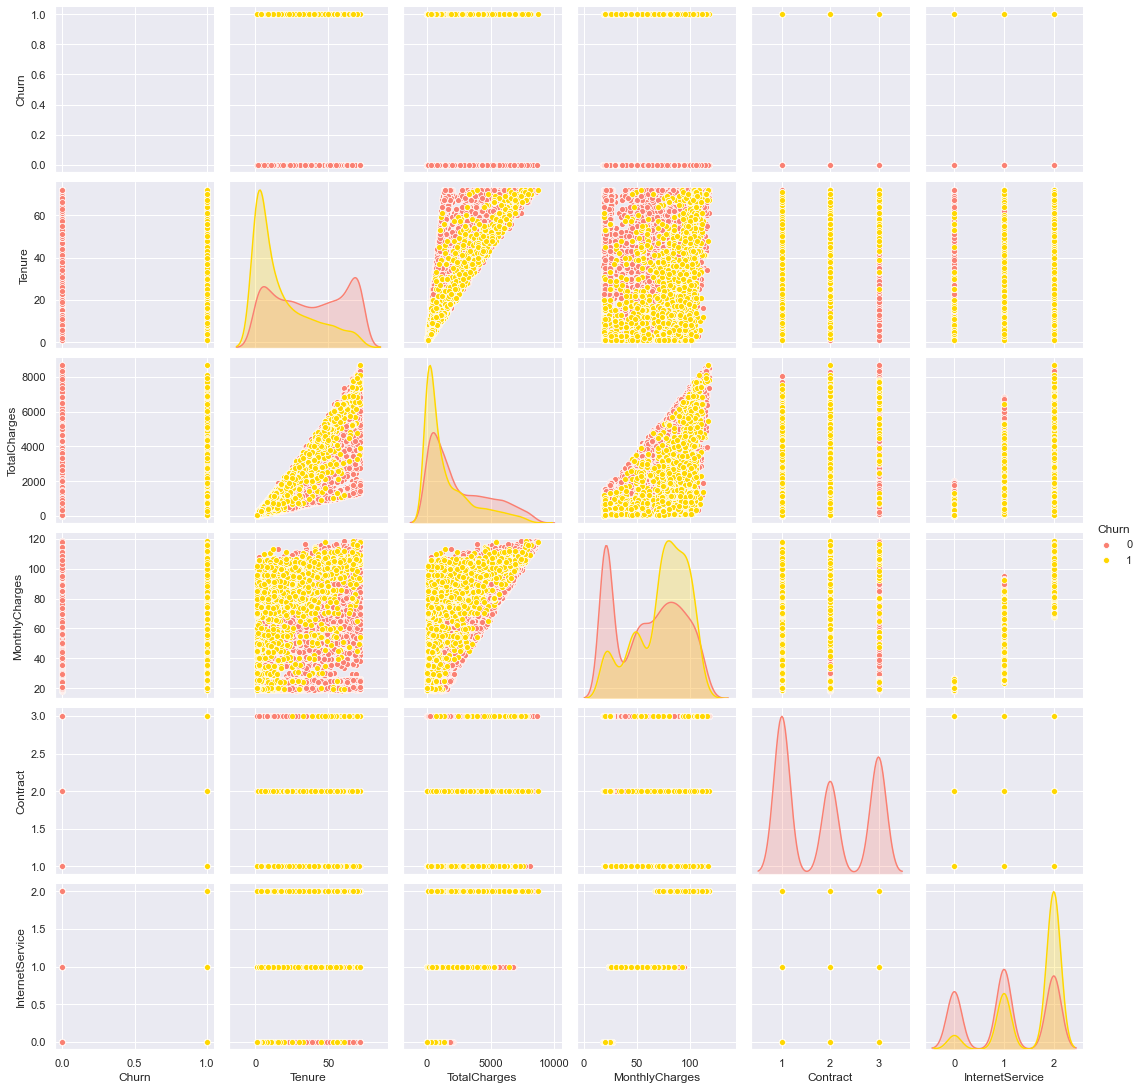

In [35]:
sns.pairplot(customerdf, vars=['Churn','Tenure','TotalCharges','MonthlyCharges','Contract','InternetService'], hue="Churn", palette=["salmon","gold"]);

* Previously, we saw Churn has a moderate correlation with internet service. From Pairplot we see with improved internet service like fibre optic customers churn more. This is interesting and suggests that customers may not be satisfied with the service. With advanced internet service customers pay more monthly charges (as per correlation analysis and pairplot), however, the service may not be satisfactory enough to retain them.

Though there is no feature which has a strong correlation with Churn, there are few features which has moderate and weak correlations. We will study if these features vary across both groups through statistical hypotheses for better insights.

In [36]:
# Test for monthly and total charges for Churn vs Non-Churn customers

import scipy.stats as st
from scipy.stats import ttest_1samp, ttest_ind, norm, t

monthly_churn = customerdf[customerdf['Churn'] == 1].MonthlyCharges
monthly_nochurn = customerdf[customerdf['Churn'] == 0].MonthlyCharges

total_churn = customerdf[customerdf['Churn'] == 1].TotalCharges
total_nochurn = customerdf[customerdf['Churn'] == 0].TotalCharges

t_stat_monthly, p_value_monthly = st.ttest_ind(monthly_churn, monthly_nochurn)
t_stat_total, p_value_total = st.ttest_ind(total_churn, total_nochurn)


if p_value_monthly < 0.05:
    print("The monthly charges for churn and non-churn customers is different")
else:
    print("The monthly charges for churn and non-churn customers is same")
    
    
if p_value_total < 0.05:
    print("The total charges for churn and non-churn customers is different")
else:
    print("The total charges for churn and non-churn customers is same")



The monthly charges for churn and non-churn customers is different
The total charges for churn and non-churn customers is different


In [37]:
# Test for Tenure for Churn vs Non-Churn customers

tenure_churn = customerdf[customerdf['Churn'] == 1].Tenure
tenure_nochurn = customerdf[customerdf['Churn'] == 0].Tenure


t_stat_tenure, p_value_tenure = st.ttest_ind(tenure_churn, tenure_nochurn)

if p_value_tenure < 0.05:
    print("The average tenure for churn and non-churn customers is different")
else:
    print("The average tenure for churn and non-churn customers is same")
    
    

The average tenure for churn and non-churn customers is different


In [38]:
# Test of independence between Churn and Contract Type

table=pd.crosstab(customerdf.Churn, customerdf.Contract,rownames=['Churn'], colnames=['Contract Type'])

from scipy.stats import chi2_contingency

stat, p, dof, expected = st.chi2_contingency(table)

if p < 0.05:
    print("Churn and Contract Type are associated")
else:
    print("Churn and Contract Type are independent")


Churn and Contract Type are associated


In [39]:
# Test of independence between Churn and Internet Service

table=pd.crosstab(customerdf.Churn, customerdf.InternetService,rownames=['Churn'], colnames=['Internet Service'])

from scipy.stats import chi2_contingency

stat, p, dof, expected = st.chi2_contingency(table)

if p < 0.05:
    print("Churn and Internet Service Type are associated")
else:
    print("Churn and Internet Service are independent")


Churn and Internet Service Type are associated


* From all the above results we conclude that features like charges (both monthly and total), internet service, contract type and tenure play some role in the decision of churning.

<a id='Pre-processing'></a>

# Data Pre-Processing

#### Segregate predictors vs target attributes

In [40]:
# Segregate predictors vs target attributes (x=predictors, Y=target)

X = customerdf.drop('Churn',axis=1)
Y = customerdf['Churn']


#### Check for target balancing and fix it if found imbalanced

In [41]:
print("Non-Churn customers     : {0} ({1:0.2f}%)".format(len(customerdf.loc[customerdf['Churn'] == 0]), (len(customerdf.loc[customerdf['Churn'] == 0])/len(customerdf.index)) * 100))
print("Churn customers         : {0} ({1:0.2f}%)".format(len(customerdf.loc[customerdf['Churn'] == 1]), (len(customerdf.loc[customerdf['Churn'] == 1])/len(customerdf.index)) * 100))


Non-Churn customers     : 5174 (73.46%)
Churn customers         : 1869 (26.54%)


The data is imbalanced with 73.5% non-churn customers and 26.5% churn customers.

Target imbalance could be worked on by using techniques like up-sampling (the minor class), down-sampling (the major class).



#### Perform train-test split

In [43]:
# Perform 70:30 train:test split with stratify sampling on target variable to maintain the distribution of dependent variable

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1,stratify=customerdf['Churn'])

print("Train Non-Churn customers    : {0} ({1:0.2f}%)".format(len(y_train.loc[y_train[:] == 0]), (len(y_train.loc[y_train[:] == 0])/len(y_train.index)) * 100))
print("Train Churn customers        : {0} ({1:0.2f}%)".format(len(y_train.loc[y_train[:] == 1]), (len(y_train.loc[y_train[:] == 1])/len(y_train.index)) * 100))

print()
print()

print("Test Non-Churn customers    : {0} ({1:0.2f}%)".format(len(y_test.loc[y_test[:] == 0]), (len(y_test.loc[y_test[:] == 0])/len(y_test.index)) * 100))
print("Test Churn customers        : {0} ({1:0.2f}%)".format(len(y_test.loc[y_test[:] == 1]), (len(y_test.loc[y_test[:] == 1])/len(y_test.index)) * 100))



Train Non-Churn customers    : 3622 (73.47%)
Train Churn customers        : 1308 (26.53%)


Test Non-Churn customers    : 1552 (73.45%)
Test Churn customers        : 561 (26.55%)


In terms of distribution of target variable the train and test data is similar to the original data-set with 73.5% non-churn and 26.5% churn customers.

#### Fix Target Imbalance through SMOTE Up-sampling

In [31]:
pip install imblearn

  Using cached imbalanced_learn-0.8.0-py3-none-any.whl (206 kB)



In [44]:
import imblearn
from imblearn.over_sampling import SMOTE

print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())


print("After UpSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_res==0)))


Before UpSampling, counts of label '1': 1308
Before UpSampling, counts of label '0': 3622 

After UpSampling, counts of label '1': 3622
After UpSampling, counts of label '0': 3622 



We will first perform modelling on the original data. Later, we will perform on the upsampled data.

#### Comparison of Original and Train / Test data

* We already saw in terms of distribution of target variable original, train and test data are similar.
* We may check for some of the statistical measures for the numerical features and see if the mean, standard deviation and different percentiles vary for the 3 data.


In [45]:
print('Statistics of Original data')
X[['MonthlyCharges','TotalCharges','Tenure']].describe()
print()

print('Statistics of Train data')
x_train[['MonthlyCharges','TotalCharges','Tenure']].describe()
print()

print('Statistics of Test data')
x_test[['MonthlyCharges','TotalCharges','Tenure']].describe()


Statistics of Original data


,MonthlyCharges,TotalCharges,Tenure
count,7043.000000,7043.000000,7043.000000
mean,64.761692,2281.916928,32.416442
std,30.090047,2265.270398,24.526454
min,18.250000,18.800000,1.000000
25%,35.500000,402.225000,9.000000
50%,70.350000,1397.475000,29.000000
75%,89.850000,3786.600000,55.000000
max,118.750000,8684.800000,72.000000



Statistics of Train data


,MonthlyCharges,TotalCharges,Tenure
count,4930.000000,4930.000000,4930.000000
mean,65.272606,2298.931699,32.457809
std,29.928253,2271.047075,24.564140
min,18.400000,18.800000,1.000000
25%,39.412500,411.487500,9.000000
50%,70.550000,1406.775000,29.000000
75%,89.950000,3823.762500,56.000000
max,118.750000,8684.800000,72.000000



Statistics of Test data


,MonthlyCharges,TotalCharges,Tenure
count,2113.000000,2113.000000,2113.000000
mean,63.569640,2242.218481,32.319924
std,30.437992,2251.770441,24.443830
min,18.250000,18.850000,1.000000
25%,29.250000,385.000000,9.000000
50%,69.950000,1378.450000,29.000000
75%,89.700000,3674.950000,55.000000
max,118.650000,8477.700000,72.000000


The 25th percentile for Monthly Charges vary across the 3 data. Otherwise the 3 data look very similar in terms of the numerical features. We do not perform any further statistical hypothesis testing to check if the slight differences are significant or not.

<a id='Model'></a>

# Model Training, Testing and Tuning

#### Decision Tree

In [31]:

dTree1 = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree1.fit(x_train, y_train)

print("Train data accuracy:",dTree1.score(x_train, y_train))
print("Test data accuracy:",dTree1.score(x_test, y_test))

DecisionTreeClassifier(random_state=1)

Train data accuracy: 0.9981744421906694
Test data accuracy: 0.7240889730241363


* Both train and test accuracies are strong. However, the train accuracy is close to 100% while that for test is 72%. This difference indicates overfit.

* The overfit can be rectified by using regularization or tuning techniques.

* Before doing the regularization, we check the other performance measures like recall, precision etc.

<Figure size 504x360 with 0 Axes>

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1552
           1       0.48      0.48      0.48       561

    accuracy                           0.72      2113
   macro avg       0.65      0.65      0.65      2113
weighted avg       0.72      0.72      0.72      2113

accuracy= 0.7240889730241363
precison= 0.48028673835125446
recall= 0.47771836007130125
f1 score= 0.47899910634495085
ROC_AUC= 0.6454313449841043


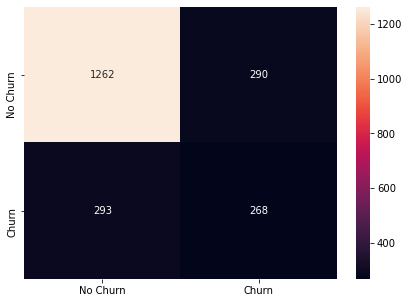

In [32]:


y_predict_dTree1 = dTree1.predict(x_test)

cm1 = confusion_matrix(y_test, y_predict_dTree1, labels=[0, 1])

df_cm1 = pd.DataFrame(cm1, index = [i for i in ["No Churn","Churn"]],
                  columns = [i for i in ["No Churn","Churn"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm1, annot=True ,fmt='g')

print(metrics.classification_report(y_test,y_predict_dTree1))
print('accuracy=',metrics.accuracy_score(y_test,y_predict_dTree1))
print('precison=',metrics.precision_score(y_test,y_predict_dTree1))
print('recall=',metrics.recall_score(y_test,y_predict_dTree1))
print('f1 score=',metrics.f1_score(y_test,y_predict_dTree1))
print('ROC_AUC=',metrics.roc_auc_score(y_test,y_predict_dTree1))

* Both Precision and Recall are around 0.48 indicating the model is not good. We had already seen that the model is an overfit.
* For a churn model we would prefer to identify the churn customers and hence will prefer a higher recall than precision.

#### Decision Tree - Regularization, Max Depth = 3

The max depth is the maximum depth of the tree. If it or any other criteria is not specified then nodes are expanded until all leaves are pure. This may lead to good fit of the train data but poor performance in the test data (overfit issue). This is what we saw in the original model.



In [33]:
dTreeR1 = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR1.fit(x_train, y_train)

print("Train data accuracy:",dTreeR1.score(x_train, y_train))
print("Test data accuracy:",dTreeR1.score(x_test, y_test))

DecisionTreeClassifier(max_depth=3, random_state=1)

Train data accuracy: 0.7900608519269777
Test data accuracy: 0.7884524372929484


<Figure size 504x360 with 0 Axes>

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      1552
           1       0.71      0.34      0.46       561

    accuracy                           0.79      2113
   macro avg       0.76      0.64      0.66      2113
weighted avg       0.78      0.79      0.76      2113

accuracy= 0.7884524372929484
precison= 0.7142857142857143
recall= 0.33868092691622104
f1 score= 0.45949214026602175
ROC_AUC= 0.6448559273756361


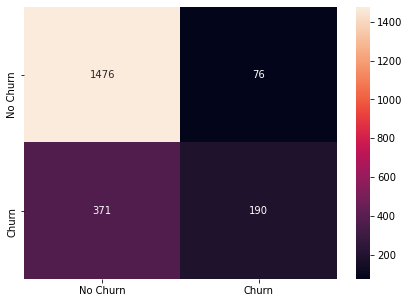

In [34]:
y_predict_dTreeR1 = dTreeR1.predict(x_test)

cm2 = confusion_matrix(y_test, y_predict_dTreeR1, labels=[0, 1])

df_cm2 = pd.DataFrame(cm2, index = [i for i in ["No Churn","Churn"]],
                  columns = [i for i in ["No Churn","Churn"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm2, annot=True ,fmt='g')


print(metrics.classification_report(y_test,y_predict_dTreeR1))
print('accuracy=',metrics.accuracy_score(y_test,y_predict_dTreeR1))
print('precison=',metrics.precision_score(y_test,y_predict_dTreeR1))
print('recall=',metrics.recall_score(y_test,y_predict_dTreeR1))
print('f1 score=',metrics.f1_score(y_test,y_predict_dTreeR1))
print('ROC_AUC=',metrics.roc_auc_score(y_test,y_predict_dTreeR1))

* Introducing the max depth regularization criteria improves the overfit issue.
* However, recall falls down to 0.33. Precision goes up to 0.71. Due to the much low recall, the f1-score also drops down to 0.45 which is lower than the original model.

#### Decison Tree - Regularization, max depth =3, min samples split = 8, min samples leaf = 5

* Along with the max depth criteria, we introduce two more criteria min_samples_split and min_samples_leaf.
* The min_samples_split is the minimum number of samples required to split an internal node. This means if the number of samples is less than the min_samples_split then the node will not split further.
* The min_samples_leaf is the minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches.

In [35]:
dTreeR2 = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, min_samples_split = 8, min_samples_leaf = 5, random_state=1)
dTreeR2.fit(x_train, y_train)

print("Train data accuracy:",dTreeR2.score(x_train, y_train))
print("Test data accuracy:",dTreeR2.score(x_test, y_test))

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=8,
                       random_state=1)

Train data accuracy: 0.7900608519269777
Test data accuracy: 0.7884524372929484


<Figure size 504x360 with 0 Axes>

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      1552
           1       0.71      0.34      0.46       561

    accuracy                           0.79      2113
   macro avg       0.76      0.64      0.66      2113
weighted avg       0.78      0.79      0.76      2113

accuracy= 0.7884524372929484
precison= 0.7142857142857143
recall= 0.33868092691622104
f1 score= 0.45949214026602175
ROC_AUC= 0.6448559273756361


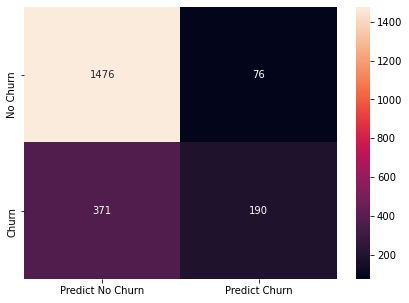

In [36]:
y_predict_dTreeR2 = dTreeR2.predict(x_test)

cm3 = confusion_matrix(y_test, y_predict_dTreeR2, labels=[0, 1])

df_cm3 = pd.DataFrame(cm3, index = [i for i in ["No Churn","Churn"]],
                  columns = [i for i in ["Predict No Churn","Predict Churn"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm3, annot=True ,fmt='g')

print(metrics.classification_report(y_test,y_predict_dTreeR2))
print('accuracy=',metrics.accuracy_score(y_test,y_predict_dTreeR2))
print('precison=',metrics.precision_score(y_test,y_predict_dTreeR2))
print('recall=',metrics.recall_score(y_test,y_predict_dTreeR2))
print('f1 score=',metrics.f1_score(y_test,y_predict_dTreeR2))
print('ROC_AUC=',metrics.roc_auc_score(y_test,y_predict_dTreeR2))

* There's no improvement with other regularization techniques. It is same as 1st regularization.

Amongst all the Decision Trees we choose the last one to visualise the tree and then will move ensemble techniques.

In [37]:
#### Visualising the tree

train_char_label = ['No Churn', 'Churn']
Churn_Tree_FileR = open('churn_TreeR2.dot','w')
dot_data = export_graphviz(dTreeR2, out_file=Churn_Tree_FileR, feature_names = list(x_train), class_names = list(train_char_label))
Churn_Tree_FileR.close()



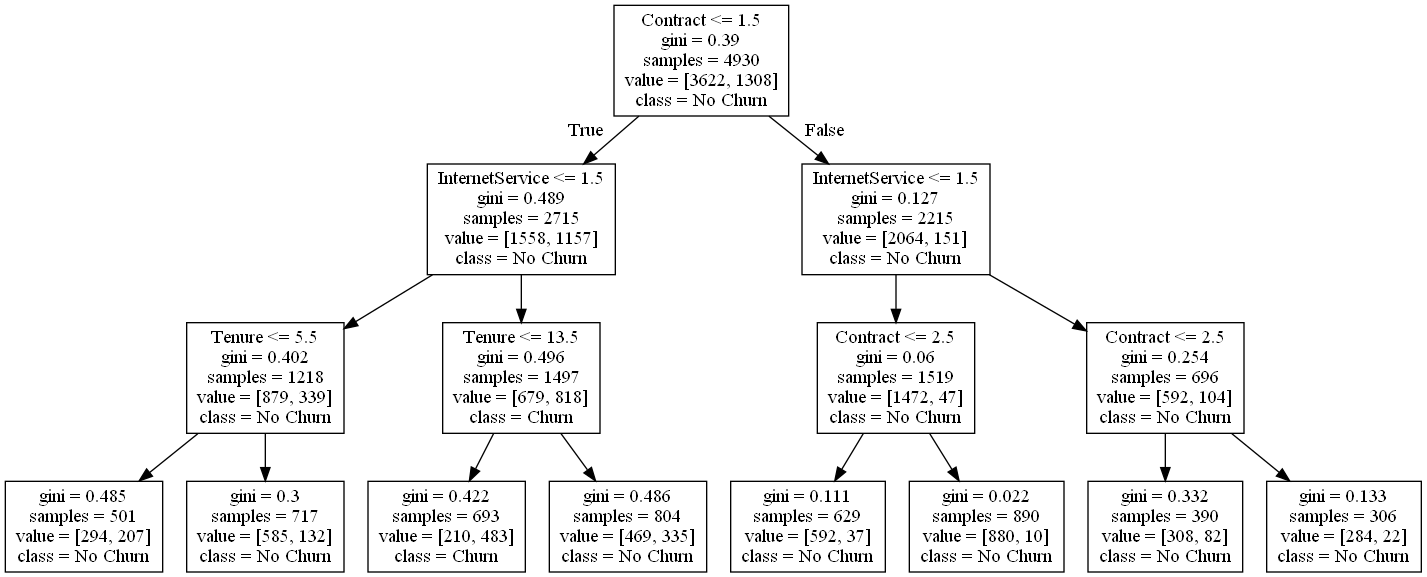

In [38]:
#Works only if "dot" command works on you machine

retCode = system("dot -Tpng churn_TreeR2.dot -o churn_TreeR2.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("churn_TreeR2.png"))

From the above tree it is evident that contract, internet service and tenure are the most critical features. We will perform feature importance to check.

In [39]:
# Feature Importance

print (pd.DataFrame(dTreeR2.feature_importances_, columns = ["Feature Importance"], index = x_train.columns))

                  Feature Importance
gender                      0.000000
SeniorCitizen               0.000000
Partner                     0.000000
Dependents                  0.000000
PhoneService                0.000000
MultipleLines               0.000000
InternetService             0.211329
OnlineSecurity              0.000000
OnlineBackup                0.000000
DeviceProtection            0.000000
TechSupport                 0.000000
StreamingTV                 0.000000
StreamingMovies             0.000000
Contract                    0.616759
PaperlessBilling            0.000000
PaymentMethod               0.000000
MonthlyCharges              0.000000
Tenure                      0.171912
TotalCharges                0.000000


From the feature importance analysis we see that Contract is the most important feature followed by Internet Service and Tenure.  No other features has any importance.

#### Other Models

We will now perform ensemble techniques to check if we get better result than decision tree.

#### Ensemble Technique - Random Forest

In [40]:

rfcl1 = RandomForestClassifier(random_state=1)
rfcl1 = rfcl1.fit(x_train, y_train)

print("Train data accuracy:",rfcl1.score(x_train, y_train))
print("Test data accuracy:",rfcl1.score(x_test, y_test))

Train data accuracy: 0.9981744421906694
Test data accuracy: 0.7960246095598675


<Figure size 504x360 with 0 Axes>

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1552
           1       0.65      0.49      0.56       561

    accuracy                           0.80      2113
   macro avg       0.74      0.70      0.71      2113
weighted avg       0.78      0.80      0.79      2113

accuracy= 0.7960246095598675
precison= 0.6547619047619048
recall= 0.49019607843137253
f1 score= 0.5606523955147809
ROC_AUC= 0.6983841216899132


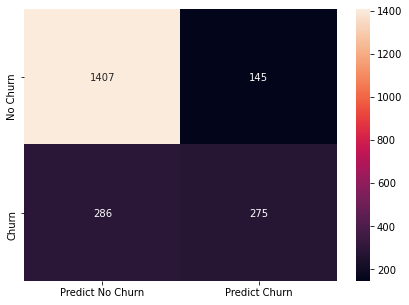

In [41]:
y_predict_rfcl1 = rfcl1.predict(x_test)

cm4 = confusion_matrix(y_test, y_predict_rfcl1, labels=[0, 1])

df_cm4 = pd.DataFrame(cm4, index = [i for i in ["No Churn","Churn"]],
                  columns = [i for i in ["Predict No Churn","Predict Churn"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm4, annot=True ,fmt='g')

print(metrics.classification_report(y_test,y_predict_rfcl1))
print('accuracy=',metrics.accuracy_score(y_test,y_predict_rfcl1))
print('precison=',metrics.precision_score(y_test,y_predict_rfcl1))
print('recall=',metrics.recall_score(y_test,y_predict_rfcl1))
print('f1 score=',metrics.f1_score(y_test,y_predict_rfcl1))
print('ROC_AUC=',metrics.roc_auc_score(y_test,y_predict_rfcl1))

* Similar to Decision Tree, Random Forest without any tuning is an overfitted model with relatively poor accuracy on test data.
* Recall is still lower than Precision. f1-score has increased compared to the ones generated from Decsion trees.

#### Random Forest - Regularization, n_estimators = 1000, max_features=10

* n_estimators is the number of trees in the forest. The default is 100. We increase this to 1000, to check, if more trees make the model learn better.

* max_features is the number of features to consider for the split.

In [42]:
rfcl2 = RandomForestClassifier(n_estimators = 1000, random_state=1,max_features=10)
rfcl2 = rfcl2.fit(x_train, y_train)

print("Train data accuracy:",rfcl2.score(x_train, y_train))
print("Test data accuracy:",rfcl2.score(x_test, y_test))

Train data accuracy: 0.9981744421906694
Test data accuracy: 0.7983909133932797


<Figure size 504x360 with 0 Axes>

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1552
           1       0.65      0.52      0.58       561

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113

accuracy= 0.7983909133932797
precison= 0.6523702031602708
recall= 0.5151515151515151
f1 score= 0.5756972111553785
ROC_AUC= 0.707962355513902


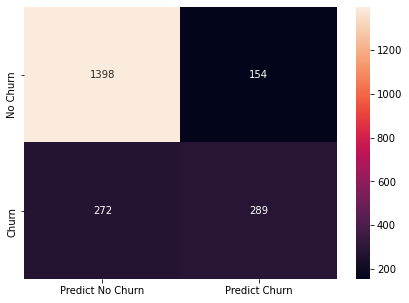

In [43]:
y_predict_rfcl2 = rfcl2.predict(x_test)

cm5 = confusion_matrix(y_test, y_predict_rfcl2, labels=[0, 1])

df_cm5 = pd.DataFrame(cm5, index = [i for i in ["No Churn","Churn"]],
                  columns = [i for i in ["Predict No Churn","Predict Churn"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm5, annot=True ,fmt='g')

print(metrics.classification_report(y_test,y_predict_rfcl2))
print('accuracy=',metrics.accuracy_score(y_test,y_predict_rfcl2))
print('precison=',metrics.precision_score(y_test,y_predict_rfcl2))
print('recall=',metrics.recall_score(y_test,y_predict_rfcl2))
print('f1 score=',metrics.f1_score(y_test,y_predict_rfcl2))
print('ROC_AUC=',metrics.roc_auc_score(y_test,y_predict_rfcl2))

* The recall increases from 0.49 to 0.51 and thus increasing the f1-score to 0.57. However, there is no improvement in terms of the acccuracy.

#### Random Forest - Regularization, n_estimators = 1000, max_features=10, criterion=entropy

We introduce the criterion factor. We change to entropy to check for improvement.

In [44]:
rfcl3 = RandomForestClassifier(n_estimators = 1000, random_state=1,max_features=10,criterion='entropy')
rfcl3 = rfcl3.fit(x_train, y_train)

print("Train data accuracy:",rfcl3.score(x_train, y_train))
print("Test data accuracy:",rfcl3.score(x_test, y_test))

Train data accuracy: 0.9981744421906694
Test data accuracy: 0.7988641741599621


<Figure size 504x360 with 0 Axes>

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1552
           1       0.65      0.52      0.58       561

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113

accuracy= 0.7988641741599621
precison= 0.6531531531531531
recall= 0.5169340463458111
f1 score= 0.5771144278606966
ROC_AUC= 0.70885362111105


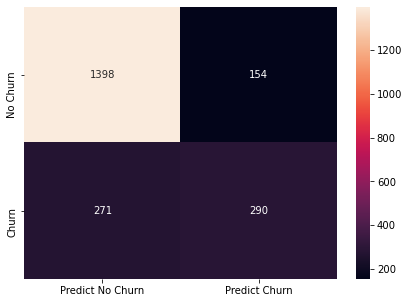

In [45]:
y_predict_rfcl3 = rfcl3.predict(x_test)

cm6 = confusion_matrix(y_test, y_predict_rfcl3, labels=[0, 1])

df_cm6 = pd.DataFrame(cm6, index = [i for i in ["No Churn","Churn"]],
                  columns = [i for i in ["Predict No Churn","Predict Churn"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm6, annot=True ,fmt='g')

print(metrics.classification_report(y_test,y_predict_rfcl3))
print('accuracy=',metrics.accuracy_score(y_test,y_predict_rfcl3))
print('precison=',metrics.precision_score(y_test,y_predict_rfcl3))
print('recall=',metrics.recall_score(y_test,y_predict_rfcl3))
print('f1 score=',metrics.f1_score(y_test,y_predict_rfcl3))
print('ROC_AUC=',metrics.roc_auc_score(y_test,y_predict_rfcl3))

* There's no considerable improvement.

#### Random Forest - Regularization, n_estimators = 1000, max_features=10, max_depth=5

We introduce the max_depth criteria which is the maximum depth of trees.

In [46]:
rfcl4 = RandomForestClassifier(n_estimators = 1000, random_state=1,max_features=10,criterion='gini',max_depth=5)
rfcl4 = rfcl4.fit(x_train, y_train)

print("Train data accuracy:",rfcl4.score(x_train, y_train))
print("Test data accuracy:",rfcl4.score(x_test, y_test))

Train data accuracy: 0.8010141987829614
Test data accuracy: 0.7998106956933271


<Figure size 504x360 with 0 Axes>

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1552
           1       0.69      0.44      0.54       561

    accuracy                           0.80      2113
   macro avg       0.76      0.69      0.71      2113
weighted avg       0.79      0.80      0.78      2113

accuracy= 0.7998106956933271
precison= 0.6916666666666667
recall= 0.44385026737967914
f1 score= 0.5407166123778502
ROC_AUC= 0.6861648244114891


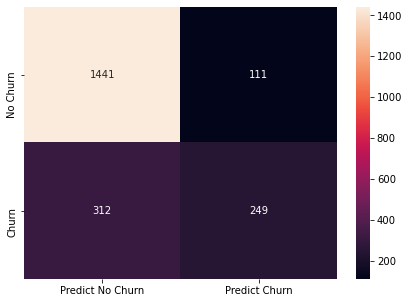

In [47]:
y_predict_rfcl4 = rfcl4.predict(x_test)

cm7 = confusion_matrix(y_test, y_predict_rfcl4, labels=[0, 1])

df_cm7 = pd.DataFrame(cm7, index = [i for i in ["No Churn","Churn"]],
                  columns = [i for i in ["Predict No Churn","Predict Churn"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm7, annot=True ,fmt='g')

print(metrics.classification_report(y_test,y_predict_rfcl4))
print('accuracy=',metrics.accuracy_score(y_test,y_predict_rfcl4))
print('precison=',metrics.precision_score(y_test,y_predict_rfcl4))
print('recall=',metrics.recall_score(y_test,y_predict_rfcl4))
print('f1 score=',metrics.f1_score(y_test,y_predict_rfcl4))
print('ROC_AUC=',metrics.roc_auc_score(y_test,y_predict_rfcl4))

* With tuning factor max_depth, the problem of overfit is resolved. However, we still find recall to be very low.

Since the problem of overfit is resolved here, we take this model to check the feature importance.

In [48]:
# Feature Importance

print (pd.DataFrame(rfcl4.feature_importances_, columns = ["Feature Importance"], index = x_train.columns))

                  Feature Importance
gender                      0.001434
SeniorCitizen               0.005547
Partner                     0.001441
Dependents                  0.001898
PhoneService                0.002964
MultipleLines               0.005764
InternetService             0.161550
OnlineSecurity              0.015302
OnlineBackup                0.009537
DeviceProtection            0.006289
TechSupport                 0.014764
StreamingTV                 0.009965
StreamingMovies             0.011182
Contract                    0.341257
PaperlessBilling            0.004500
PaymentMethod               0.014323
MonthlyCharges              0.084120
Tenure                      0.205925
TotalCharges                0.102237


* The most important features are - Contract, Tenure, Internet service and Total Charges.

#### Ensemble Technique - Bagging Classifier

For bagging classifier the deafult base estimator is Decision Tree. We choose the best selected Decision Tree and include other tuning criteria directly.

In [49]:

bgcl1 = BaggingClassifier(base_estimator=dTreeR2, n_estimators=1000,random_state=1,max_features=10)

bgcl1 = bgcl1.fit(x_train, y_train)

print("Train data accuracy:",bgcl1.score(x_train, y_train))
print("Test data accuracy:",bgcl1.score(x_test, y_test))

Train data accuracy: 0.791683569979716
Test data accuracy: 0.7903454803596782


<Figure size 504x360 with 0 Axes>

              precision    recall  f1-score   support

           0       0.80      0.94      0.87      1552
           1       0.70      0.37      0.48       561

    accuracy                           0.79      2113
   macro avg       0.75      0.65      0.67      2113
weighted avg       0.78      0.79      0.77      2113

accuracy= 0.7903454803596782
precison= 0.702054794520548
recall= 0.36541889483065954
f1 score= 0.48065650644783114
ROC_AUC= 0.6546810968998659


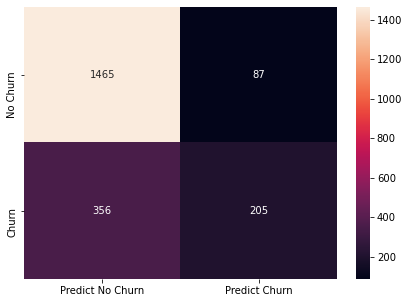

In [50]:
y_predict_bgcl1 = bgcl1.predict(x_test)

cm8 = confusion_matrix(y_test, y_predict_bgcl1, labels=[0, 1])

df_cm8 = pd.DataFrame(cm8, index = [i for i in ["No Churn","Churn"]],
                  columns = [i for i in ["Predict No Churn","Predict Churn"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm8, annot=True ,fmt='g')

print(metrics.classification_report(y_test,y_predict_bgcl1))
print('accuracy=',metrics.accuracy_score(y_test,y_predict_bgcl1))
print('precison=',metrics.precision_score(y_test,y_predict_bgcl1))
print('recall=',metrics.recall_score(y_test,y_predict_bgcl1))
print('f1 score=',metrics.f1_score(y_test,y_predict_bgcl1))
print('ROC_AUC=',metrics.roc_auc_score(y_test,y_predict_bgcl1))

* The bagging classifier using the regularized decision tree does not overfit the model and has good precison. However, there seems to be no improvement in terms of recall. The recall falls to 0.36 and thus the f1-score also falls to 0.48.

#### Ensemble Technique - Ada-Boost Classifier

For Ada-boost classifier the deafult base estimator is Decision Tree. We choose the best selected Decision Tree and include other tuning criteria directly.

In [51]:

abcl1 = AdaBoostClassifier(base_estimator=dTreeR2, n_estimators=1000, random_state=1)
abcl1 = abcl1.fit(x_train, y_train)

print("Train data accuracy:",abcl1.score(x_train, y_train))
print("Test data accuracy:",abcl1.score(x_test, y_test))

Train data accuracy: 0.9981744421906694
Test data accuracy: 0.7411263606247042


<Figure size 504x360 with 0 Axes>

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1552
           1       0.51      0.45      0.48       561

    accuracy                           0.74      2113
   macro avg       0.66      0.65      0.65      2113
weighted avg       0.73      0.74      0.74      2113

accuracy= 0.7411263606247042
precison= 0.5142857142857142
recall= 0.44919786096256686
f1 score= 0.47954329210275926
ROC_AUC= 0.6479236727493246


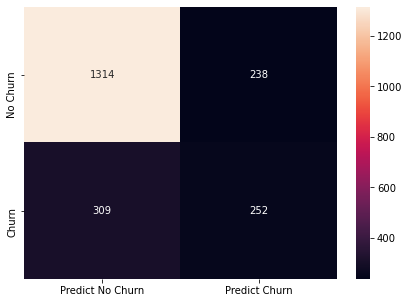

In [52]:
y_predict_abcl1 = abcl1.predict(x_test)

cm9 = confusion_matrix(y_test, y_predict_abcl1, labels=[0, 1])

df_cm9 = pd.DataFrame(cm9, index = [i for i in ["No Churn","Churn"]],
                  columns = [i for i in ["Predict No Churn","Predict Churn"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm9, annot=True ,fmt='g')

print(metrics.classification_report(y_test,y_predict_abcl1))
print('accuracy=',metrics.accuracy_score(y_test,y_predict_abcl1))
print('precison=',metrics.precision_score(y_test,y_predict_abcl1))
print('recall=',metrics.recall_score(y_test,y_predict_abcl1))
print('f1 score=',metrics.f1_score(y_test,y_predict_abcl1))
print('ROC_AUC=',metrics.roc_auc_score(y_test,y_predict_abcl1))

* The Ada-Boost seems to overfit the model with train accuracy 0.998 and test accuracy 0.74.

#### Ensemble Technique - Gradient Boosting Classifier

* Gradient boosting is based on trade off between learning rate and n_estimator since learning rate shrinks the contribution of each tree. Here, since the no of estimators is large we take the default learning rate of 0.1.

In [53]:

gbcl1 = GradientBoostingClassifier(n_estimators = 1000,random_state=1)
gbcl1 = gbcl1.fit(x_train, y_train)

print("Train data accuracy:",gbcl1.score(x_train, y_train))
print("Test data accuracy:",gbcl1.score(x_test, y_test))

Train data accuracy: 0.9338742393509127
Test data accuracy: 0.7860861334595362


<Figure size 504x360 with 0 Axes>

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.62      0.51      0.56       561

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113

accuracy= 0.7860861334595362
precison= 0.6182212581344902
recall= 0.5080213903743316
f1 score= 0.5577299412915853
ROC_AUC= 0.6973096642593307


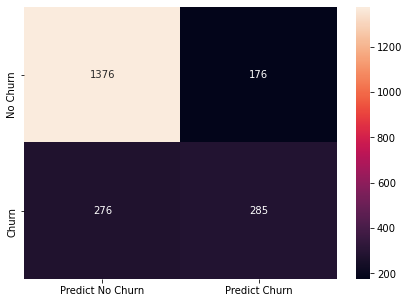

In [54]:
y_predict_gbcl1 = gbcl1.predict(x_test)

cm10 = confusion_matrix(y_test, y_predict_gbcl1, labels=[0, 1])

df_cm10 = pd.DataFrame(cm10, index = [i for i in ["No Churn","Churn"]],
                  columns = [i for i in ["Predict No Churn","Predict Churn"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm10, annot=True ,fmt='g')

print(metrics.classification_report(y_test,y_predict_gbcl1))
print('accuracy=',metrics.accuracy_score(y_test,y_predict_gbcl1))
print('precison=',metrics.precision_score(y_test,y_predict_gbcl1))
print('recall=',metrics.recall_score(y_test,y_predict_gbcl1))
print('f1 score=',metrics.f1_score(y_test,y_predict_gbcl1))
print('ROC_AUC=',metrics.roc_auc_score(y_test,y_predict_gbcl1))

From all the above models we see that while the overfit issue could be worked upon, we couldn't fix the low recall. We will try using the upsampled data to check.


#### Classification using Up-sampled data

In [55]:

dTreeR2 = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, min_samples_split = 8, min_samples_leaf = 5, random_state=1)
dTreeR2.fit(x_train_res, y_train_res)

print("Train data accuracy:",dTreeR2.score(x_train_res, y_train_res))
print("Test data accuracy:",dTreeR2.score(x_test, y_test))

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=8,
                       random_state=1)

Train data accuracy: 0.7657371617890668
Test data accuracy: 0.6966398485565547


<Figure size 504x360 with 0 Axes>

              precision    recall  f1-score   support

           0       0.89      0.67      0.76      1552
           1       0.46      0.78      0.58       561

    accuracy                           0.70      2113
   macro avg       0.68      0.72      0.67      2113
weighted avg       0.78      0.70      0.71      2113

accuracy= 0.6966398485565547
precison= 0.4579831932773109
recall= 0.7771836007130125
f1 score= 0.5763384005287507
ROC_AUC= 0.7223546869544445


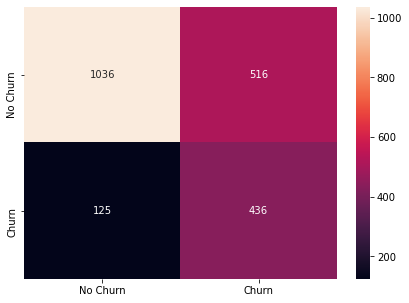

In [56]:

y_predict_dTreeR2 = dTreeR2.predict(x_test)

cm = confusion_matrix(y_test, y_predict_dTreeR2, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No Churn","Churn"]],
                  columns = [i for i in ["No Churn","Churn"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

print(metrics.classification_report(y_test,y_predict_dTreeR2))
print('accuracy=',metrics.accuracy_score(y_test,y_predict_dTreeR2))
print('precison=',metrics.precision_score(y_test,y_predict_dTreeR2))
print('recall=',metrics.recall_score(y_test,y_predict_dTreeR2))
print('f1 score=',metrics.f1_score(y_test,y_predict_dTreeR2))
print('ROC_AUC=',metrics.roc_auc_score(y_test,y_predict_dTreeR2))

* There's considerable improvement in recall. The overfit issue is also less, though the test accuracy is low. We can try with ensemble techniques to check.

#### Random Forest with Up-sampled data

In [57]:

rfcl = RandomForestClassifier(n_estimators = 1000, random_state=1,max_features=10,criterion='gini',max_depth=5)
rfcl = rfcl.fit(x_train_res, y_train_res)

print("Train data accuracy:",rfcl.score(x_train_res, y_train_res))
print("Test data accuracy:",rfcl.score(x_test, y_test))

Train data accuracy: 0.8268912203202651
Test data accuracy: 0.7610033128253668


<Figure size 504x360 with 0 Axes>

              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1552
           1       0.54      0.76      0.63       561

    accuracy                           0.76      2113
   macro avg       0.72      0.76      0.73      2113
weighted avg       0.80      0.76      0.77      2113

accuracy= 0.7610033128253668
precison= 0.5353535353535354
recall= 0.7557932263814616
f1 score= 0.6267553584626755
ROC_AUC= 0.759339912159803


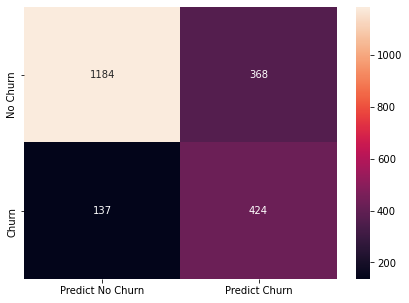

In [58]:
y_predict_rfcl = rfcl.predict(x_test)

cm = confusion_matrix(y_test, y_predict_rfcl, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No Churn","Churn"]],
                  columns = [i for i in ["Predict No Churn","Predict Churn"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

print(metrics.classification_report(y_test,y_predict_rfcl))
print('accuracy=',metrics.accuracy_score(y_test,y_predict_rfcl))
print('precison=',metrics.precision_score(y_test,y_predict_rfcl))
print('recall=',metrics.recall_score(y_test,y_predict_rfcl))
print('f1 score=',metrics.f1_score(y_test,y_predict_rfcl))
print('ROC_AUC=',metrics.roc_auc_score(y_test,y_predict_rfcl))

* The accuracy of test data is 0.76 and that for train data is 0.82. Both accuracies are good, though the model fits the train data better the gap is less.
* The recall is 0.75. This is higher than the precison which is 0.53. The f1-score is 0.62 which is relatively higher than many of the prior models.

We see that with the up-sampled data the recall increases. Hence, moving forward we will now use Bagging and Boosting with up-sampled data but with different classifiers like Logistic, Knn, Naive Bayes, SVM and Decison Tree. For Boosting we cannot fit knn for weight issues, hence we will not fit knn for boosting.


Also, moving forward, we will not show the confusion matrix anymore. We will continue to show only the report.

#### Bagging with Logistic as Base Estimator

In [59]:
bgcl = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=1000,random_state=1,max_features=10)

bgcl = bgcl.fit(x_train_res, y_train_res)

print("Train data accuracy:",bgcl.score(x_train_res, y_train_res))
print("Test data accuracy:",bgcl.score(x_test, y_test))


y_predict_bgcl = bgcl.predict(x_test)


print(metrics.classification_report(y_test,y_predict_bgcl))
print('accuracy=',metrics.accuracy_score(y_test,y_predict_bgcl))
print('precison=',metrics.precision_score(y_test,y_predict_bgcl))
print('recall=',metrics.recall_score(y_test,y_predict_bgcl))
print('f1 score=',metrics.f1_score(y_test,y_predict_bgcl))
print('ROC_AUC=',metrics.roc_auc_score(y_test,y_predict_bgcl))

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Train data accuracy: 0.8052181115405853
Test data accuracy: 0.7586370089919545
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1552
           1       0.53      0.72      0.61       561

    accuracy                           0.76      2113
   macro avg       0.71      0.75      0.72      2113
weighted avg       0.79      0.76      0.77      2113

accuracy= 0.7586370089919545
precison= 0.5338645418326693
recall= 0.7165775401069518
f1 score= 0.6118721461187214
ROC_AUC= 0.7452088731462595


#### Bagging with Knn as Base estimator

In [60]:
bgcl = BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=1000,random_state=1,max_features=10)

bgcl = bgcl.fit(x_train_res, y_train_res)

print("Train data accuracy:",bgcl.score(x_train_res, y_train_res))
print("Test data accuracy:",bgcl.score(x_test, y_test))


y_predict_bgcl = bgcl.predict(x_test)


print(metrics.classification_report(y_test,y_predict_bgcl))
print('accuracy=',metrics.accuracy_score(y_test,y_predict_bgcl))
print('precison=',metrics.precision_score(y_test,y_predict_bgcl))
print('recall=',metrics.recall_score(y_test,y_predict_bgcl))
print('f1 score=',metrics.f1_score(y_test,y_predict_bgcl))
print('ROC_AUC=',metrics.roc_auc_score(y_test,y_predict_bgcl))

Train data accuracy: 0.9001932633903921
Test data accuracy: 0.7288215806909607
              precision    recall  f1-score   support

           0       0.87      0.75      0.80      1552
           1       0.49      0.68      0.57       561

    accuracy                           0.73      2113
   macro avg       0.68      0.71      0.69      2113
weighted avg       0.77      0.73      0.74      2113

accuracy= 0.7288215806909607
precison= 0.49226804123711343
recall= 0.6809269162210339
f1 score= 0.5714285714285714
ROC_AUC= 0.7135304684197953


In [61]:

bgcl = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,random_state=1,max_features=10)

bgcl = bgcl.fit(x_train_res, y_train_res)

print("Train data accuracy:",bgcl.score(x_train_res, y_train_res))
print("Test data accuracy:",bgcl.score(x_test, y_test))


y_predict_bgcl = bgcl.predict(x_test)


print(metrics.classification_report(y_test,y_predict_bgcl))
print('accuracy=',metrics.accuracy_score(y_test,y_predict_bgcl))
print('precison=',metrics.precision_score(y_test,y_predict_bgcl))
print('recall=',metrics.recall_score(y_test,y_predict_bgcl))
print('f1 score=',metrics.f1_score(y_test,y_predict_bgcl))
print('ROC_AUC=',metrics.roc_auc_score(y_test,y_predict_bgcl))

Train data accuracy: 0.9977912755383765
Test data accuracy: 0.7799337434926644
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1552
           1       0.58      0.63      0.60       561

    accuracy                           0.78      2113
   macro avg       0.72      0.73      0.73      2113
weighted avg       0.79      0.78      0.78      2113

accuracy= 0.7799337434926644
precison= 0.5789473684210527
recall= 0.6274509803921569
f1 score= 0.6022241231822071
ROC_AUC= 0.7312512633919548


In [62]:
bgcl = BaggingClassifier(base_estimator=svm.SVC(), n_estimators=1000,random_state=1,max_features=10)

bgcl = bgcl.fit(x_train_res, y_train_res)

print("Train data accuracy:",bgcl.score(x_train_res, y_train_res))
print("Test data accuracy:",bgcl.score(x_test, y_test))


y_predict_bgcl = bgcl.predict(x_test)


print(metrics.classification_report(y_test,y_predict_bgcl))
print('accuracy=',metrics.accuracy_score(y_test,y_predict_bgcl))
print('precison=',metrics.precision_score(y_test,y_predict_bgcl))
print('recall=',metrics.recall_score(y_test,y_predict_bgcl))
print('f1 score=',metrics.f1_score(y_test,y_predict_bgcl))
print('ROC_AUC=',metrics.roc_auc_score(y_test,y_predict_bgcl))

Train data accuracy: 0.6739370513528438
Test data accuracy: 0.6772361571225746
              precision    recall  f1-score   support

           0       0.83      0.70      0.76      1552
           1       0.43      0.61      0.50       561

    accuracy                           0.68      2113
   macro avg       0.63      0.66      0.63      2113
weighted avg       0.73      0.68      0.69      2113

accuracy= 0.6772361571225746
precison= 0.4252163164400494
recall= 0.6131907308377896
f1 score= 0.5021897810218978
ROC_AUC= 0.6567886643879669


In [63]:
bgcl = BaggingClassifier(base_estimator=GaussianNB(), n_estimators=1000,random_state=1,max_features=10)

bgcl = bgcl.fit(x_train_res, y_train_res)

print("Train data accuracy:",bgcl.score(x_train_res, y_train_res))
print("Test data accuracy:",bgcl.score(x_test, y_test))


y_predict_bgcl = bgcl.predict(x_test)



print(metrics.classification_report(y_test,y_predict_bgcl))
print('accuracy=',metrics.accuracy_score(y_test,y_predict_bgcl))
print('precison=',metrics.precision_score(y_test,y_predict_bgcl))
print('recall=',metrics.recall_score(y_test,y_predict_bgcl))
print('f1 score=',metrics.f1_score(y_test,y_predict_bgcl))
print('ROC_AUC=',metrics.roc_auc_score(y_test,y_predict_bgcl))

Train data accuracy: 0.7773329652125898
Test data accuracy: 0.7430194036914339
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1552
           1       0.51      0.75      0.61       561

    accuracy                           0.74      2113
   macro avg       0.70      0.75      0.71      2113
weighted avg       0.79      0.74      0.76      2113

accuracy= 0.7430194036914339
precison= 0.5109223300970874
recall= 0.750445632798574
f1 score= 0.6079422382671481
ROC_AUC= 0.7453903421724829


In [64]:
abcl = AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=1000,random_state=1)

abcl = abcl.fit(x_train_res, y_train_res)

print("Train data accuracy:",abcl.score(x_train_res, y_train_res))
print("Test data accuracy:",abcl.score(x_test, y_test))


y_predict_abcl = abcl.predict(x_test)


print(metrics.classification_report(y_test,y_predict_abcl))
print('accuracy=',metrics.accuracy_score(y_test,y_predict_abcl))
print('precison=',metrics.precision_score(y_test,y_predict_abcl))
print('recall=',metrics.recall_score(y_test,y_predict_abcl))
print('f1 score=',metrics.f1_score(y_test,y_predict_abcl))
print('ROC_AUC=',metrics.roc_auc_score(y_test,y_predict_abcl))

Train data accuracy: 0.8065985643290999
Test data accuracy: 0.738760056791292
              precision    recall  f1-score   support

           0       0.87      0.75      0.81      1552
           1       0.51      0.70      0.59       561

    accuracy                           0.74      2113
   macro avg       0.69      0.73      0.70      2113
weighted avg       0.78      0.74      0.75      2113

accuracy= 0.738760056791292
precison= 0.5058064516129033
recall= 0.6987522281639929
f1 score= 0.5868263473053892
ROC_AUC= 0.7259869388242645


In [65]:
abcl = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,random_state=1)

abcl = abcl.fit(x_train_res, y_train_res)

print("Train data accuracy:",bgcl.score(x_train_res, y_train_res))
print("Test data accuracy:",bgcl.score(x_test, y_test))


y_predict_abcl = abcl.predict(x_test)


print(metrics.classification_report(y_test,y_predict_abcl))
print('accuracy=',metrics.accuracy_score(y_test,y_predict_abcl))
print('precison=',metrics.precision_score(y_test,y_predict_abcl))
print('recall=',metrics.recall_score(y_test,y_predict_abcl))
print('f1 score=',metrics.f1_score(y_test,y_predict_abcl))
print('ROC_AUC=',metrics.roc_auc_score(y_test,y_predict_abcl))

Train data accuracy: 0.7773329652125898
Test data accuracy: 0.7430194036914339
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1552
           1       0.54      0.57      0.55       561

    accuracy                           0.76      2113
   macro avg       0.69      0.70      0.69      2113
weighted avg       0.76      0.76      0.76      2113

accuracy= 0.759110269758637
precison= 0.5446735395189003
recall= 0.5650623885918004
f1 score= 0.5546806649168854
ROC_AUC= 0.6971574829556939


In [66]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')
abcl = AdaBoostClassifier(base_estimator=svc, n_estimators=1000,random_state=1)

abcl = abcl.fit(x_train_res, y_train_res)

print("Train data accuracy:",abcl.score(x_train_res, y_train_res))
print("Test data accuracy:",abcl.score(x_test, y_test))


y_predict_abcl = abcl.predict(x_test)


print(metrics.classification_report(y_test,y_predict_abcl))
print('accuracy=',metrics.accuracy_score(y_test,y_predict_abcl))
print('precison=',metrics.precision_score(y_test,y_predict_abcl))
print('recall=',metrics.recall_score(y_test,y_predict_abcl))
print('f1 score=',metrics.f1_score(y_test,y_predict_abcl))
print('ROC_AUC=',metrics.roc_auc_score(y_test,y_predict_abcl))

Train data accuracy: 0.6428768636112645
Test data accuracy: 0.5939422621864647
              precision    recall  f1-score   support

           0       0.83      0.56      0.67      1552
           1       0.36      0.69      0.48       561

    accuracy                           0.59      2113
   macro avg       0.60      0.63      0.57      2113
weighted avg       0.71      0.59      0.62      2113

accuracy= 0.5939422621864647
precison= 0.36186046511627906
recall= 0.6934046345811051
f1 score= 0.4755501222493887
ROC_AUC= 0.6256971626513773


In [67]:
abcl = AdaBoostClassifier(base_estimator=GaussianNB(), n_estimators=1000,random_state=1)

abcl = abcl.fit(x_train_res, y_train_res)

print("Train data accuracy:",abcl.score(x_train_res, y_train_res))
print("Test data accuracy:",abcl.score(x_test, y_test))


y_predict_abcl = abcl.predict(x_test)


print(metrics.classification_report(y_test,y_predict_abcl))
print('accuracy=',metrics.accuracy_score(y_test,y_predict_abcl))
print('precison=',metrics.precision_score(y_test,y_predict_abcl))
print('recall=',metrics.recall_score(y_test,y_predict_abcl))
print('f1 score=',metrics.f1_score(y_test,y_predict_abcl))
print('ROC_AUC=',metrics.roc_auc_score(y_test,y_predict_abcl))

Train data accuracy: 0.6098840419657647
Test data accuracy: 0.547089446284903
              precision    recall  f1-score   support

           0       0.77      0.55      0.64      1552
           1       0.30      0.53      0.38       561

    accuracy                           0.55      2113
   macro avg       0.53      0.54      0.51      2113
weighted avg       0.64      0.55      0.57      2113

accuracy= 0.547089446284903
precison= 0.3004032258064516
recall= 0.5311942959001783
f1 score= 0.38377334191886675
ROC_AUC= 0.542014673723285


| Model | Train Accuracy | Test Accuracy | Precision | Recall | f1-score | ROC |
| --- | --- | --- | --- | --- | --- | --- |
| Random Forest | 0.82 | 0.76 | 0.53 | 0.75 | 0.62 |0.75 |
| Bagging Logistic | 0.80 | 0.75 | 0.53 | 0.71 | 0.61 | 0.74 |
| Bagging Knn | 0.90 | 0.72 | 0.49 | 0.68 | 0.57 | 0.71 |
| Bagging Decision Tree | 0.99 | 0.77 | 0.57 | 0.62 | 0.60 |0.73 |
| Bagging SVM | 0.67 | 0.67 | 0.42 | 0.61 | 0.50 | 0.65 |
| Bagging NB | 0.77 | 0.74 | 0.51 | 0.75 | 0.60 | 0.75 |
| Boosting Logistic | 0.80 | 0.73 | 0.50 | 0.69 | 0.58 | 0.72 |
| Boosting Decision Tree | 0.77 | 0.74 | 0.54 | 0.56 | 0.55 | 0.69 |
| Boosting SVM | 0.64 | 0.59 | 0.36 | 0.69 | 0.48 | 0.63 |
| Boosting NB | 0.61 | 0.55 | 0.30 | 0.53 | 0.39 | 0.54 |

* The models with highest accuracies are Bagging Decison Tree (0.77), Random Forest (0.76), Bagging Logistic (0.75), Bagging NB (0.74) and Boosting Decision Tree(0.74).
* Among these Bagging NB and Boosting Decision Tree are preferred as they do not have overfit issue. For the others the difference between train and test accuracies are high and hence may be overfitted models.
* We choose Bagging NB over Boosting Decision Tree because the recall for bagging NB is 0.75 which is much higher than that of Boosting DT. This indicate that Bagging NB is more powerful to detect the churn customers.
* The other measures of this model also looks good with f1-score of 0.6 and ROC of 0.75, which indicates the model is capable of separating the churn and non-churn.






#### Pickle the Model

We have finalised our model. We will re-run the same assiging it as final model. Then use that to pickle the model.

In [68]:
model=BaggingClassifier(base_estimator=GaussianNB(), n_estimators=1000,random_state=1,max_features=10)
model.fit(x_train_res, y_train_res)

BaggingClassifier(base_estimator=GaussianNB(), max_features=10,
                  n_estimators=1000, random_state=1)

In [69]:
# Save the Modle to file in the current working directory


Pkl_Filename = "Pickle_Final_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)
    
    
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    pickled_model = pickle.load(file)

pickled_model


# Use the Reloaded Model to 
# Calculate the accuracy score and predict target values

# Calculate the Score 
score = pickled_model.score(x_test, y_test)

# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  

# Predict the Labels using the reloaded Model
y_predict = pickled_model.predict(x_test)  

y_predict

BaggingClassifier(base_estimator=GaussianNB(), max_features=10,
                  n_estimators=1000, random_state=1)

Test score: 74.30 %


array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

<a id='GUI'></a>

# GUI Development

In [1]:
import tkinter as tk
from tkinter import ttk
import re

# App Window

win = tk.Tk()
win.title('Churn Prediction for Telecom Operator')

Gender=ttk.Label(win, text="Gender")
Gender.grid(row=0,column=0,sticky=tk.W)
Gender_var=tk.StringVar()
Gender_entrybox=ttk.Combobox(win, width=25,textvariable=Gender_var)
Gender_entrybox['values']=('Male','Female')
Gender_entrybox.grid(row=0,column=2)


Age=ttk.Label(win, text="Senior Citizen")
Age.grid(row=1,column=0,sticky=tk.W)
Age_var=tk.IntVar()
Age_entrybox=ttk.Combobox(win, width=25,textvariable=Age_var)
Age_entrybox['values']=(0,1)
Age_entrybox.grid(row=1,column=2)


Partner=ttk.Label(win, text="Partner")
Partner.grid(row=2,column=0,sticky=tk.W)
Partner_var=tk.StringVar()
Partner_entrybox=ttk.Combobox(win, width=25,textvariable=Partner_var)
Partner_entrybox['values']=('No','Yes')
Partner_entrybox.grid(row=2,column=2)


Dependents=ttk.Label(win, text="Dependents")
Dependents.grid(row=3,column=0,sticky=tk.W)
Dependents_var=tk.StringVar()
Dependents_entrybox=ttk.Combobox(win, width=25,textvariable=Dependents_var)
Dependents_entrybox['values']=('No','Yes')
Dependents_entrybox.grid(row=3,column=2)

Tenure=ttk.Label(win, text="Tenure")
Tenure.grid(row=4,column=0,sticky=tk.W)
Tenure_var=tk.DoubleVar()
Tenure_entrybox=ttk.Entry(win, width=25,textvariable=Tenure_var)
Tenure_entrybox.grid(row=4,column=2)

Phone=ttk.Label(win, text="Phone Services")
Phone.grid(row=5,column=0,sticky=tk.W)
Phone_var=tk.StringVar()
Phone_entrybox=ttk.Combobox(win, width=25,textvariable=Phone_var)
Phone_entrybox['values']=('No','Yes')
Phone_entrybox.grid(row=5,column=2)

Lines=ttk.Label(win, text="Multiple Lines")
Lines.grid(row=6,column=0,sticky=tk.W)
Lines_var=tk.StringVar()
Lines_entrybox=ttk.Combobox(win, width=25,textvariable=Lines_var)
Lines_entrybox['values']=('No','Yes','No phone service')
Lines_entrybox.grid(row=6,column=2)


Internet=ttk.Label(win, text="Internet Service")
Internet.grid(row=7,column=0,sticky=tk.W)
Internet_var=tk.StringVar()
Internet_entrybox=ttk.Combobox(win, width=25,textvariable=Internet_var)
Internet_entrybox['values']=('Fiber optic','DSL','No')
Internet_entrybox.grid(row=7,column=2)


Security=ttk.Label(win, text="Online Security")
Security.grid(row=8,column=0,sticky=tk.W)
Security_var=tk.StringVar()
Security_entrybox=ttk.Combobox(win, width=25,textvariable=Security_var)
Security_entrybox['values']=('No','Yes','No internet service')
Security_entrybox.grid(row=8,column=2)


Backup=ttk.Label(win, text="Online Backup")
Backup.grid(row=9,column=0,sticky=tk.W)
Backup_var=tk.StringVar()
Backup_entrybox=ttk.Combobox(win, width=25,textvariable=Backup_var)
Backup_entrybox['values']=('No','Yes','No internet service')
Backup_entrybox.grid(row=9,column=2)


Device=ttk.Label(win, text="Device Protection")
Device.grid(row=10,column=0,sticky=tk.W)
Device_var=tk.StringVar()
Device_entrybox=ttk.Combobox(win, width=25,textvariable=Device_var)
Device_entrybox['values']=('No','Yes','No internet service')
Device_entrybox.grid(row=10,column=2)


Tech=ttk.Label(win, text="Tech Support")
Tech.grid(row=11,column=0,sticky=tk.W)
Tech_var=tk.StringVar()
Tech_entrybox=ttk.Combobox(win, width=25,textvariable=Tech_var)
Tech_entrybox['values']=('No','Yes','No internet service')
Tech_entrybox.grid(row=11,column=2)


TV=ttk.Label(win, text="Streaming TV")
TV.grid(row=12,column=0,sticky=tk.W)
TV_var=tk.StringVar()
TV_entrybox=ttk.Combobox(win, width=25,textvariable=TV_var)
TV_entrybox['values']=('No','Yes','No internet service')
TV_entrybox.grid(row=12,column=2)


Mov=ttk.Label(win, text="Streaming Movies")
Mov.grid(row=13,column=0,sticky=tk.W)
Mov_var=tk.StringVar()
Mov_entrybox=ttk.Combobox(win, width=25,textvariable=Mov_var)
Mov_entrybox['values']=('No','Yes','No internet service')
Mov_entrybox.grid(row=13,column=2)

Contract=ttk.Label(win, text="Contract")
Contract.grid(row=14,column=0,sticky=tk.W)
Contract_var=tk.StringVar()
Contract_entrybox=ttk.Combobox(win, width=25,textvariable=Contract_var)
Contract_entrybox['values']=('Month-on-Month','One year','Two year')
Contract_entrybox.grid(row=14,column=2)


Bill=ttk.Label(win, text="Paperless Billing")
Bill.grid(row=15,column=0,sticky=tk.W)
Bill_var=tk.StringVar()
Bill_entrybox=ttk.Combobox(win, width=25,textvariable=Bill_var)
Bill_entrybox['values']=('No','Yes')
Bill_entrybox.grid(row=15,column=2)


Payment=ttk.Label(win, text="Payment Method")
Payment.grid(row=16,column=0,sticky=tk.W)
Payment_var=tk.StringVar()
Payment_entrybox=ttk.Combobox(win, width=25,textvariable=Payment_var)
Payment_entrybox['values']=('Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)')
Payment_entrybox.grid(row=16,column=2)


Monthly=ttk.Label(win, text="Monthly Charges")
Monthly.grid(row=17,column=0,sticky=tk.W)
Monthly_var=tk.DoubleVar()
Monthly_entrybox=ttk.Entry(win, width=25,textvariable=Monthly_var)
Monthly_entrybox.grid(row=17,column=2)


Total=ttk.Label(win, text="Total Charges")
Total.grid(row=18,column=0,sticky=tk.W)
Total_var=tk.DoubleVar()
Total_entrybox=ttk.Entry(win, width=25,textvariable=Total_var)
Total_entrybox.grid(row=18,column=2)

win.mainloop()

<a id='Conclusion'></a>

# Conclusion and Improvisation

* Customers with longer contract tend to renew and be more permamnent. Based on this, it would be suggested that the operator provides better schemes and offer so that customers who go for month-on-month contract become loyal.
* Customers with fiber internet service tend to churn more than cutomers with dsl service. With fiber service, which comes at a higher charge, customers expect better streaming. It seems the telecom operator is not performing as per expectation and hence customers are churning.
* The telecom operator may work on their pricing strategies as well. We saw there's significant difference between monthly charges of churn and non-churn customers.
* Various models suggest that contract type, tenure and type of internet service play crucial role in the decision to churn.
* Among the customers who churn, the model correctly identifies 75% of them. Thus the model is able to identify a good amount of churn customers. The telecom operator may target and send customised offers for these customers specially related to their contract type.
* Along with that, the telecom operator should work to improve the internt service facilities.

**Quality :** 

* The data quality is good with very few missing values. The features provided by the telecom operator is relevant to carry out the churn analysis. 

* For future, inclusion of few features may make the analysis better : example - for telephone service how many calls customers make, for internet service what's main uasge area of customers, how frequently customers watch live streaming, if the customers had been provided any offer in the last 3/6 months etc. Inclusion of these features will enable the telecom operator to understand churn reason better, example if their internet service is not good and customers are using the servie to watch live streaming then there's chances of more customer dissatisfcation than if customers are using internet for basic browsing.

* Also, it is necessary to include customer feedback which will enable to understand the exact areas of customer satisfaction and dissatisfaction.

* For features like tenure and charges the unit was not provided. It is better to provide such units rather than doing analysis based on the units assumption. Particularly, for customer churn analysis it is very imprtant to know the tenure unit to understand the loyalty of customers.

**Quantity :** 

* The quantity of data is also good. The customer information provided was good enough to carry out ML algorithms.

* As per description the data is for one month. It would be advised to look into data for more months to rule analyse any seasonality effect. Example, it may be interesting to see if during any event (e.g. World Cup, Election etc) customers are looking for the service and post that they are discontinuing.

* Features were also enough (in terms of number) and relevant. However, as suggested above, inclusion of more features is desired.

**Variety :** 

* The data variety was good with different types of information about the customer - related to demographics, service, charges and duration / tenure etc. It was convenient to relate to the attributes and find the relationships due this underlying broad category of customer information.

**Velocity :** 

* Cannot comment on this

**Veracity :** 

* Most of the features had variability specially it there was distinction between churn and non-churn customers.